***Amazon Delivery Time Project***
--

***Problem Statement***
--

This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

**Business Use Cases**
-
- Enhanced Delivery Logistics:      
●	Predict delivery times to improve customer satisfaction and optimize delivery schedules.
Dynamic Traffic and Weather Adjustments:        
●	Adjust delivery estimates based on current traffic and weather conditions.
Agent Performance Evaluation:       
●	Evaluate agent efficiency and identify areas for training or improvement.


## Data Loading and Preprocessing

In [262]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [263]:
amazon=pd.read_csv("amazon_delivery.csv")

In [264]:
amazon

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [265]:
amazon.shape

(43739, 16)

In [266]:
amazon[amazon['Store_Longitude']==0]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
33,zotl583816092,32,3.5,0.0,0.0,0.11,0.11,2022-03-08,21:35:00,21:45:00,Stormy,Jam,scooter,Urban,35,Grocery
51,dcdm719150402,25,5.0,0.0,0.0,0.03,0.03,2022-02-13,22:10:00,22:25:00,Cloudy,Low,motorcycle,Metropolitian,75,Home
56,bbow373480117,39,4.2,0.0,0.0,0.08,0.08,2022-03-02,20:35:00,20:50:00,Fog,Jam,scooter,Semi-Urban,245,Apparel
58,etss702593505,36,4.7,0.0,0.0,0.06,0.06,2022-03-13,20:15:00,20:20:00,Cloudy,Jam,motorcycle,Metropolitian,150,Sports
66,emlt327861941,23,4.8,0.0,0.0,0.02,0.02,2022-03-07,10:40:00,10:50:00,Stormy,Low,scooter,Metropolitian,15,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,lzan335958845,26,4.9,0.0,0.0,0.07,0.07,2022-03-10,19:35:00,19:45:00,Fog,Jam,scooter,Metropolitian,32,Grocery
43722,gbvc892665917,34,4.2,0.0,0.0,0.13,0.13,2022-04-04,17:25:00,17:30:00,Stormy,Medium,motorcycle,Urban,240,Clothing
43723,xczj095858269,25,4.7,0.0,0.0,0.09,0.09,2022-03-29,22:10:00,22:15:00,Cloudy,Low,motorcycle,Metropolitian,105,Shoes
43725,wjsq095299773,32,4.6,0.0,0.0,0.05,0.05,2022-02-15,18:10:00,18:20:00,Stormy,Medium,scooter,Metropolitian,135,Skincare


In [267]:
amazon[amazon.select_dtypes("object").columns]=amazon[amazon.select_dtypes("object").columns].apply(lambda x: x.str.strip())


In [268]:
amazon.select_dtypes("object").columns

Index(['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category'],
      dtype='object')

In [269]:
for i in amazon[amazon.select_dtypes("object").columns]:
    amazon[i].replace("NaN",np.nan, inplace=True)

In [ ]:
amazon.describe()

***Dataset has NA Values in features Agent_Rating, Order_Time, Weather, Traffic***

In [271]:
amazon[amazon["Agent_Rating"].isna()]
# There are Only 54 Missing values in Agent rating Filling it with Median

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
124,uurs547552548,23,NaN,22.569358,88.433452,22.599358,88.463452,2022-02-17,23:25:00,23:35:00,Sunny,Low,motorcycle,Metropolitian,75,Snacks
1996,xoaj834389107,32,NaN,0.000000,0.000000,0.050000,0.050000,2022-02-11,20:50:00,21:00:00,Sandstorms,Jam,motorcycle,Urban,185,Snacks
2002,lasr795083832,23,NaN,25.454648,81.834502,25.584648,81.964502,2022-02-18,19:50:00,19:55:00,Windy,Jam,motorcycle,Metropolitian,150,Outdoors
2018,gjcr517387117,26,NaN,0.000000,0.000000,0.080000,0.080000,2022-02-16,23:50:00,23:55:00,Cloudy,Low,scooter,Metropolitian,140,Clothing
3253,ohgx024912559,32,NaN,19.874733,75.353942,19.984733,75.463942,2022-02-16,18:35:00,18:50:00,Sandstorms,Medium,motorcycle,Metropolitian,170,Kitchen
3385,tvng587700125,25,NaN,15.513150,73.783460,15.593150,73.863460,2022-02-18,17:40:00,17:55:00,Sunny,Medium,motorcycle,Urban,115,Clothing
4805,fctw514165232,37,NaN,0.000000,0.000000,0.060000,0.060000,2022-02-15,20:55:00,21:10:00,Cloudy,Jam,motorcycle,Metropolitian,125,Kitchen
6576,yseg007856175,21,NaN,23.264015,77.408236,23.334015,77.478236,2022-02-14,23:35:00,23:50:00,Cloudy,Low,scooter,Metropolitian,120,Kitchen
6580,rpgm542793380,24,NaN,30.372202,78.077151,30.452202,78.157151,2022-02-12,17:40:00,17:45:00,Windy,Medium,van,Metropolitian,110,Pet Supplies
7535,ilse030322540,22,NaN,15.576683,73.755750,15.586683,73.765750,2022-02-11,10:15:00,10:25:00,Stormy,Low,motorcycle,Urban,115,Sports


In [272]:
amazon["Agent_Rating"].median()

np.float64(4.7)

In [273]:
amazon["Agent_Rating"].median()

np.float64(4.7)

***Filling NA Values for "Agent rating"***

In [274]:
amazon["Agent_Rating"].fillna(amazon["Agent_Rating"].median(),inplace=True)

In [275]:
amazon[amazon["Agent_Rating"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [276]:
amazon[amazon["Weather"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,NaN,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,NaN,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,NaN,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,NaN,NaN,van,Urban,130,Jewelry


In [277]:
amazon["Weather"].value_counts()

Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

***Filling NA Values for "Weather"***

In [278]:
#  as Only a small Fraction is missing we will use Mode method to  fillna
amazon["Weather"].fillna(amazon["Weather"].mode()[0], inplace=True)

In [279]:
amazon["Weather"].value_counts()

Weather
Fog           7531
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

In [280]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43739 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43648 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43739 non-null  object 
 11  Traffic          43648 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [281]:
amazon["Traffic"].value_counts()

Traffic
Low       14999
Jam       13725
Medium    10628
High       4296
Name: count, dtype: int64

In [282]:
amazon["Traffic"].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

In [283]:
amazon["Traffic"]=amazon["Traffic"].str.strip()

In [284]:
amazon["Traffic"].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

In [285]:
amazon[amazon["Traffic"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,Fog,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,Fog,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,Fog,NaN,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,Fog,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,Fog,NaN,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,Fog,NaN,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,Fog,NaN,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,Fog,NaN,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,Fog,NaN,van,Urban,130,Jewelry


In [286]:
amazon["Traffic"].fillna(amazon["Traffic"].mode()[0], inplace=True)

In [287]:
amazon["Traffic"].value_counts()

Traffic
Low       15090
Jam       13725
Medium    10628
High       4296
Name: count, dtype: int64

***Filling NA Values for "Order Time"***

In [288]:
amazon[amazon["Order_Time"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,Fog,Low,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,Fog,Low,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,Fog,Low,bicycle,Metropolitian,100,Clothing
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,Fog,Low,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,Fog,Low,bicycle,Metropolitian,135,Jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,NaN,20:40:00,Fog,Low,scooter,Metropolitian,140,Apparel
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,NaN,09:40:00,Fog,Low,van,Metropolitian,95,Books
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,NaN,17:40:00,Fog,Low,scooter,Metropolitian,170,Jewelry
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,NaN,18:00:00,Fog,Low,van,Urban,130,Jewelry


In [289]:
amazon["Order_Time"].mode()

0    21:55:00
Name: Order_Time, dtype: object

In [290]:
amazon["Order_Time"].fillna(amazon["Order_Time"].mode()[0], inplace=True)

In [291]:
amazon[amazon["Order_Time"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


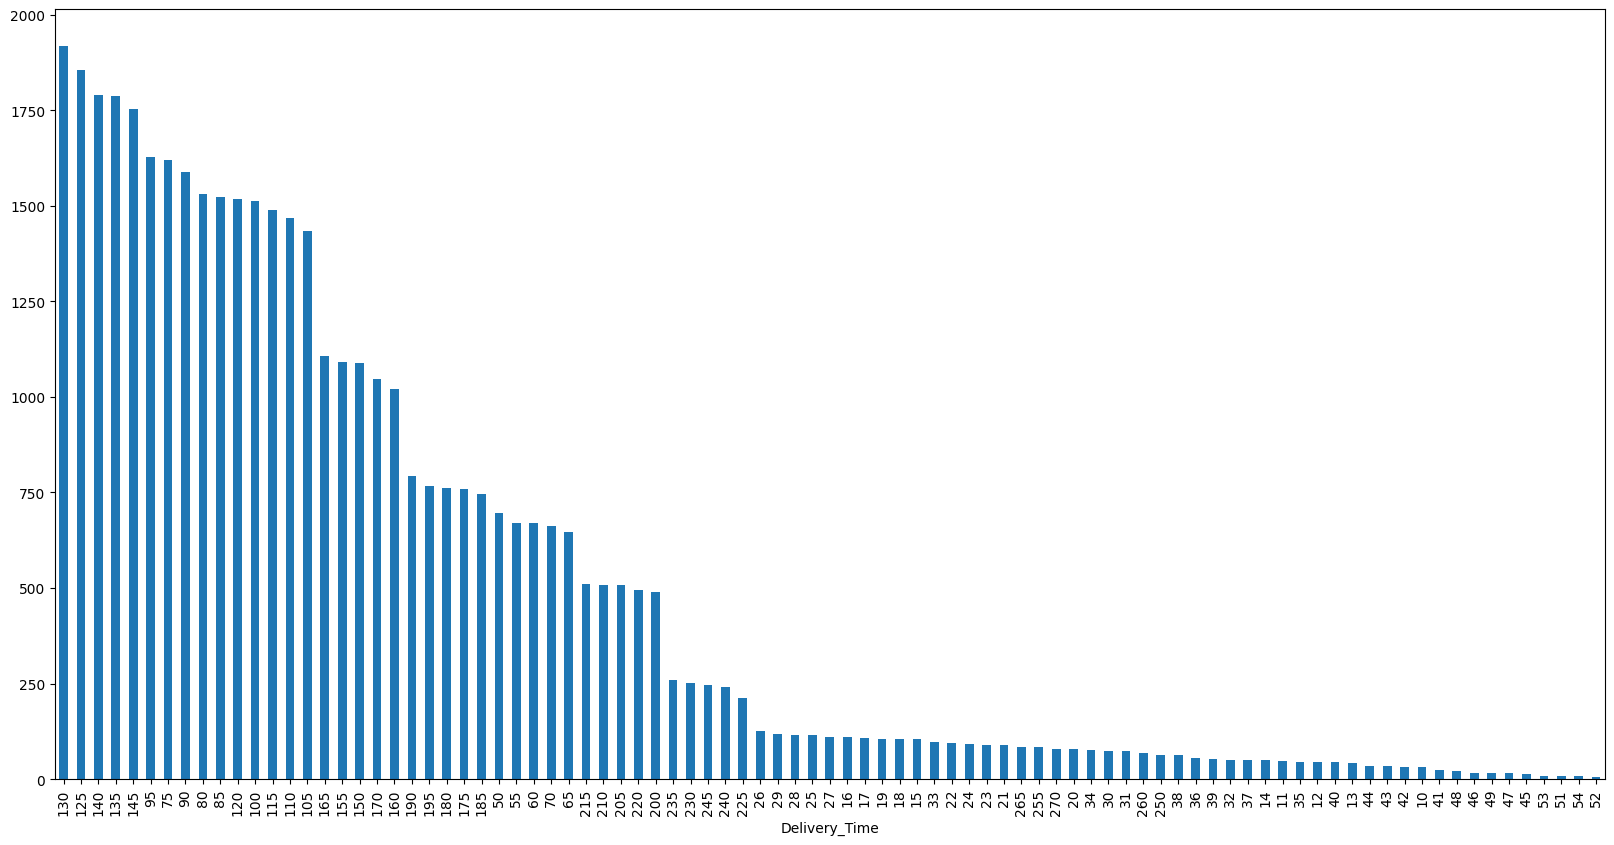

In [292]:
plt.figure(figsize=(20,10))
amazon["Delivery_Time"].value_counts().plot(kind="bar");
plt.show()

<Figure size 2000x1000 with 0 Axes>

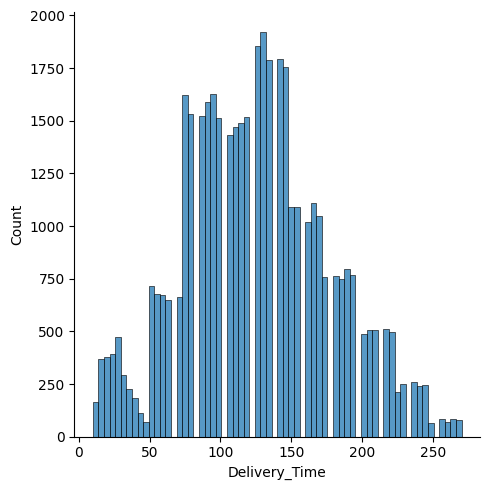

In [293]:
plt.figure(figsize=(20,10))
sns.displot(amazon["Delivery_Time"])
plt.show()

In [294]:
amazon.dtypes

Order_ID            object
Agent_Age            int64
Agent_Rating       float64
Store_Latitude     float64
Store_Longitude    float64
Drop_Latitude      float64
Drop_Longitude     float64
Order_Date          object
Order_Time          object
Pickup_Time         object
Weather             object
Traffic             object
Vehicle             object
Area                object
Delivery_Time        int64
Category            object
dtype: object

In [295]:
amazon.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics


In [296]:
amazon[amazon["Order_Time"].isnull()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [297]:
amazon.groupby("Category")["Delivery_Time"].mean()

Category
Apparel         132.048789
Books           131.021601
Clothing        130.483690
Cosmetics       132.902503
Electronics     130.837136
Grocery          26.539576
Home            130.955307
Jewelry         130.753034
Kitchen         132.326973
Outdoors        131.059337
Pet Supplies    131.291822
Shoes           131.151538
Skincare        132.027417
Snacks          131.904332
Sports          132.247150
Toys            129.395901
Name: Delivery_Time, dtype: float64

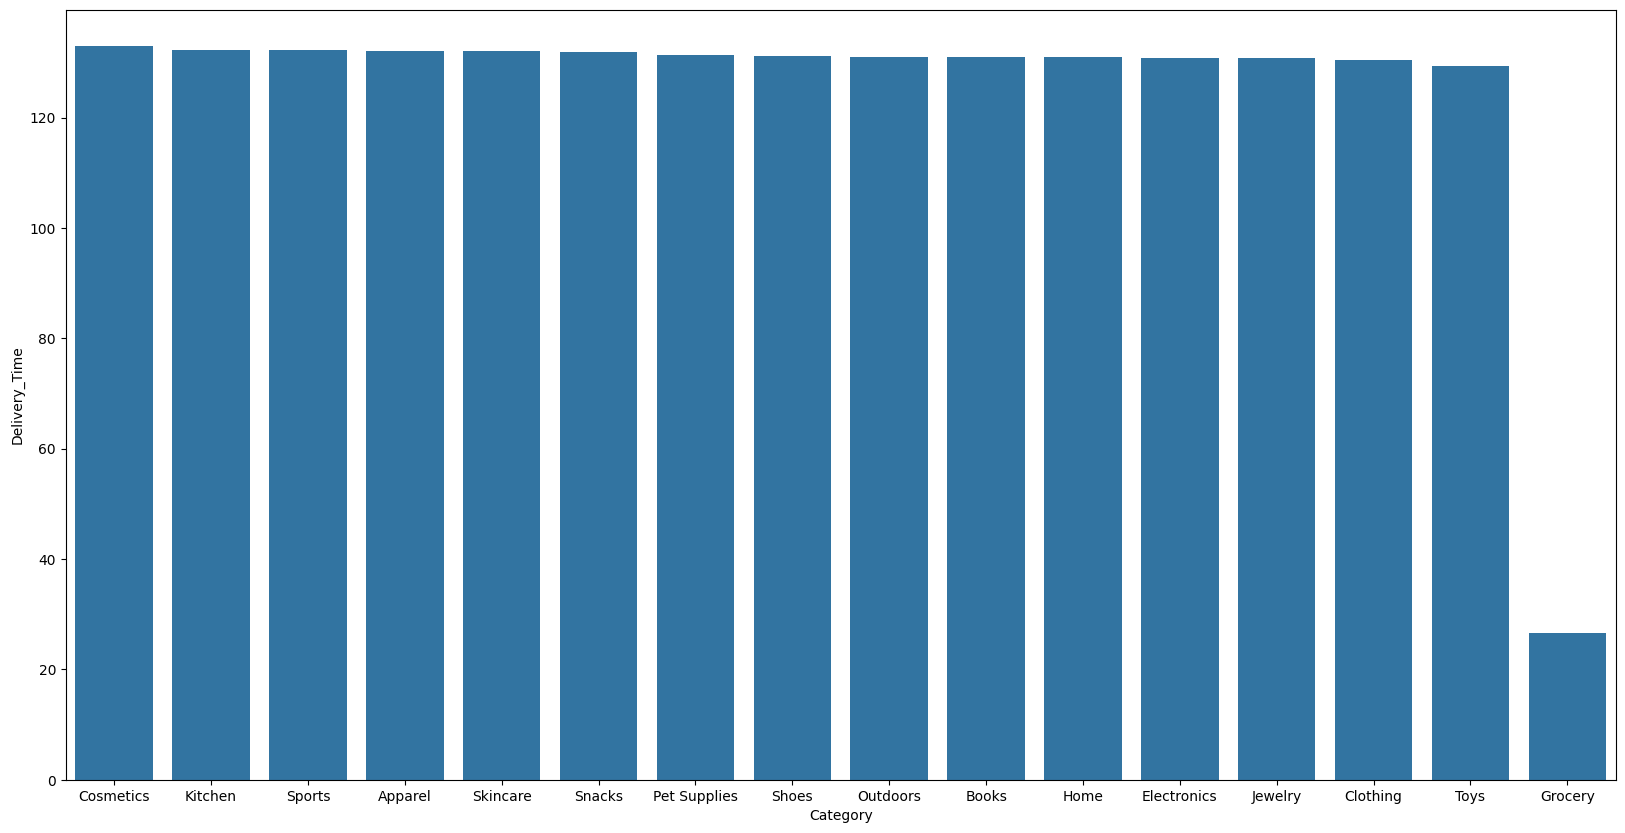

In [298]:
plt.figure(figsize=(20,10))
sns.barplot(amazon.groupby("Category")["Delivery_Time"].mean().sort_values(ascending=False));
plt.show()

In [299]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43739 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43739 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [300]:
amazon[amazon["Order_Time"].isna()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [301]:
object_columns=amazon.select_dtypes("object").columns
int_columns=amazon.select_dtypes("int").columns
float_columns=amazon.select_dtypes("float").columns

In [302]:
object_columns

Index(['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category'],
      dtype='object')

In [303]:
len(object_columns)

9

In [304]:
amazon

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


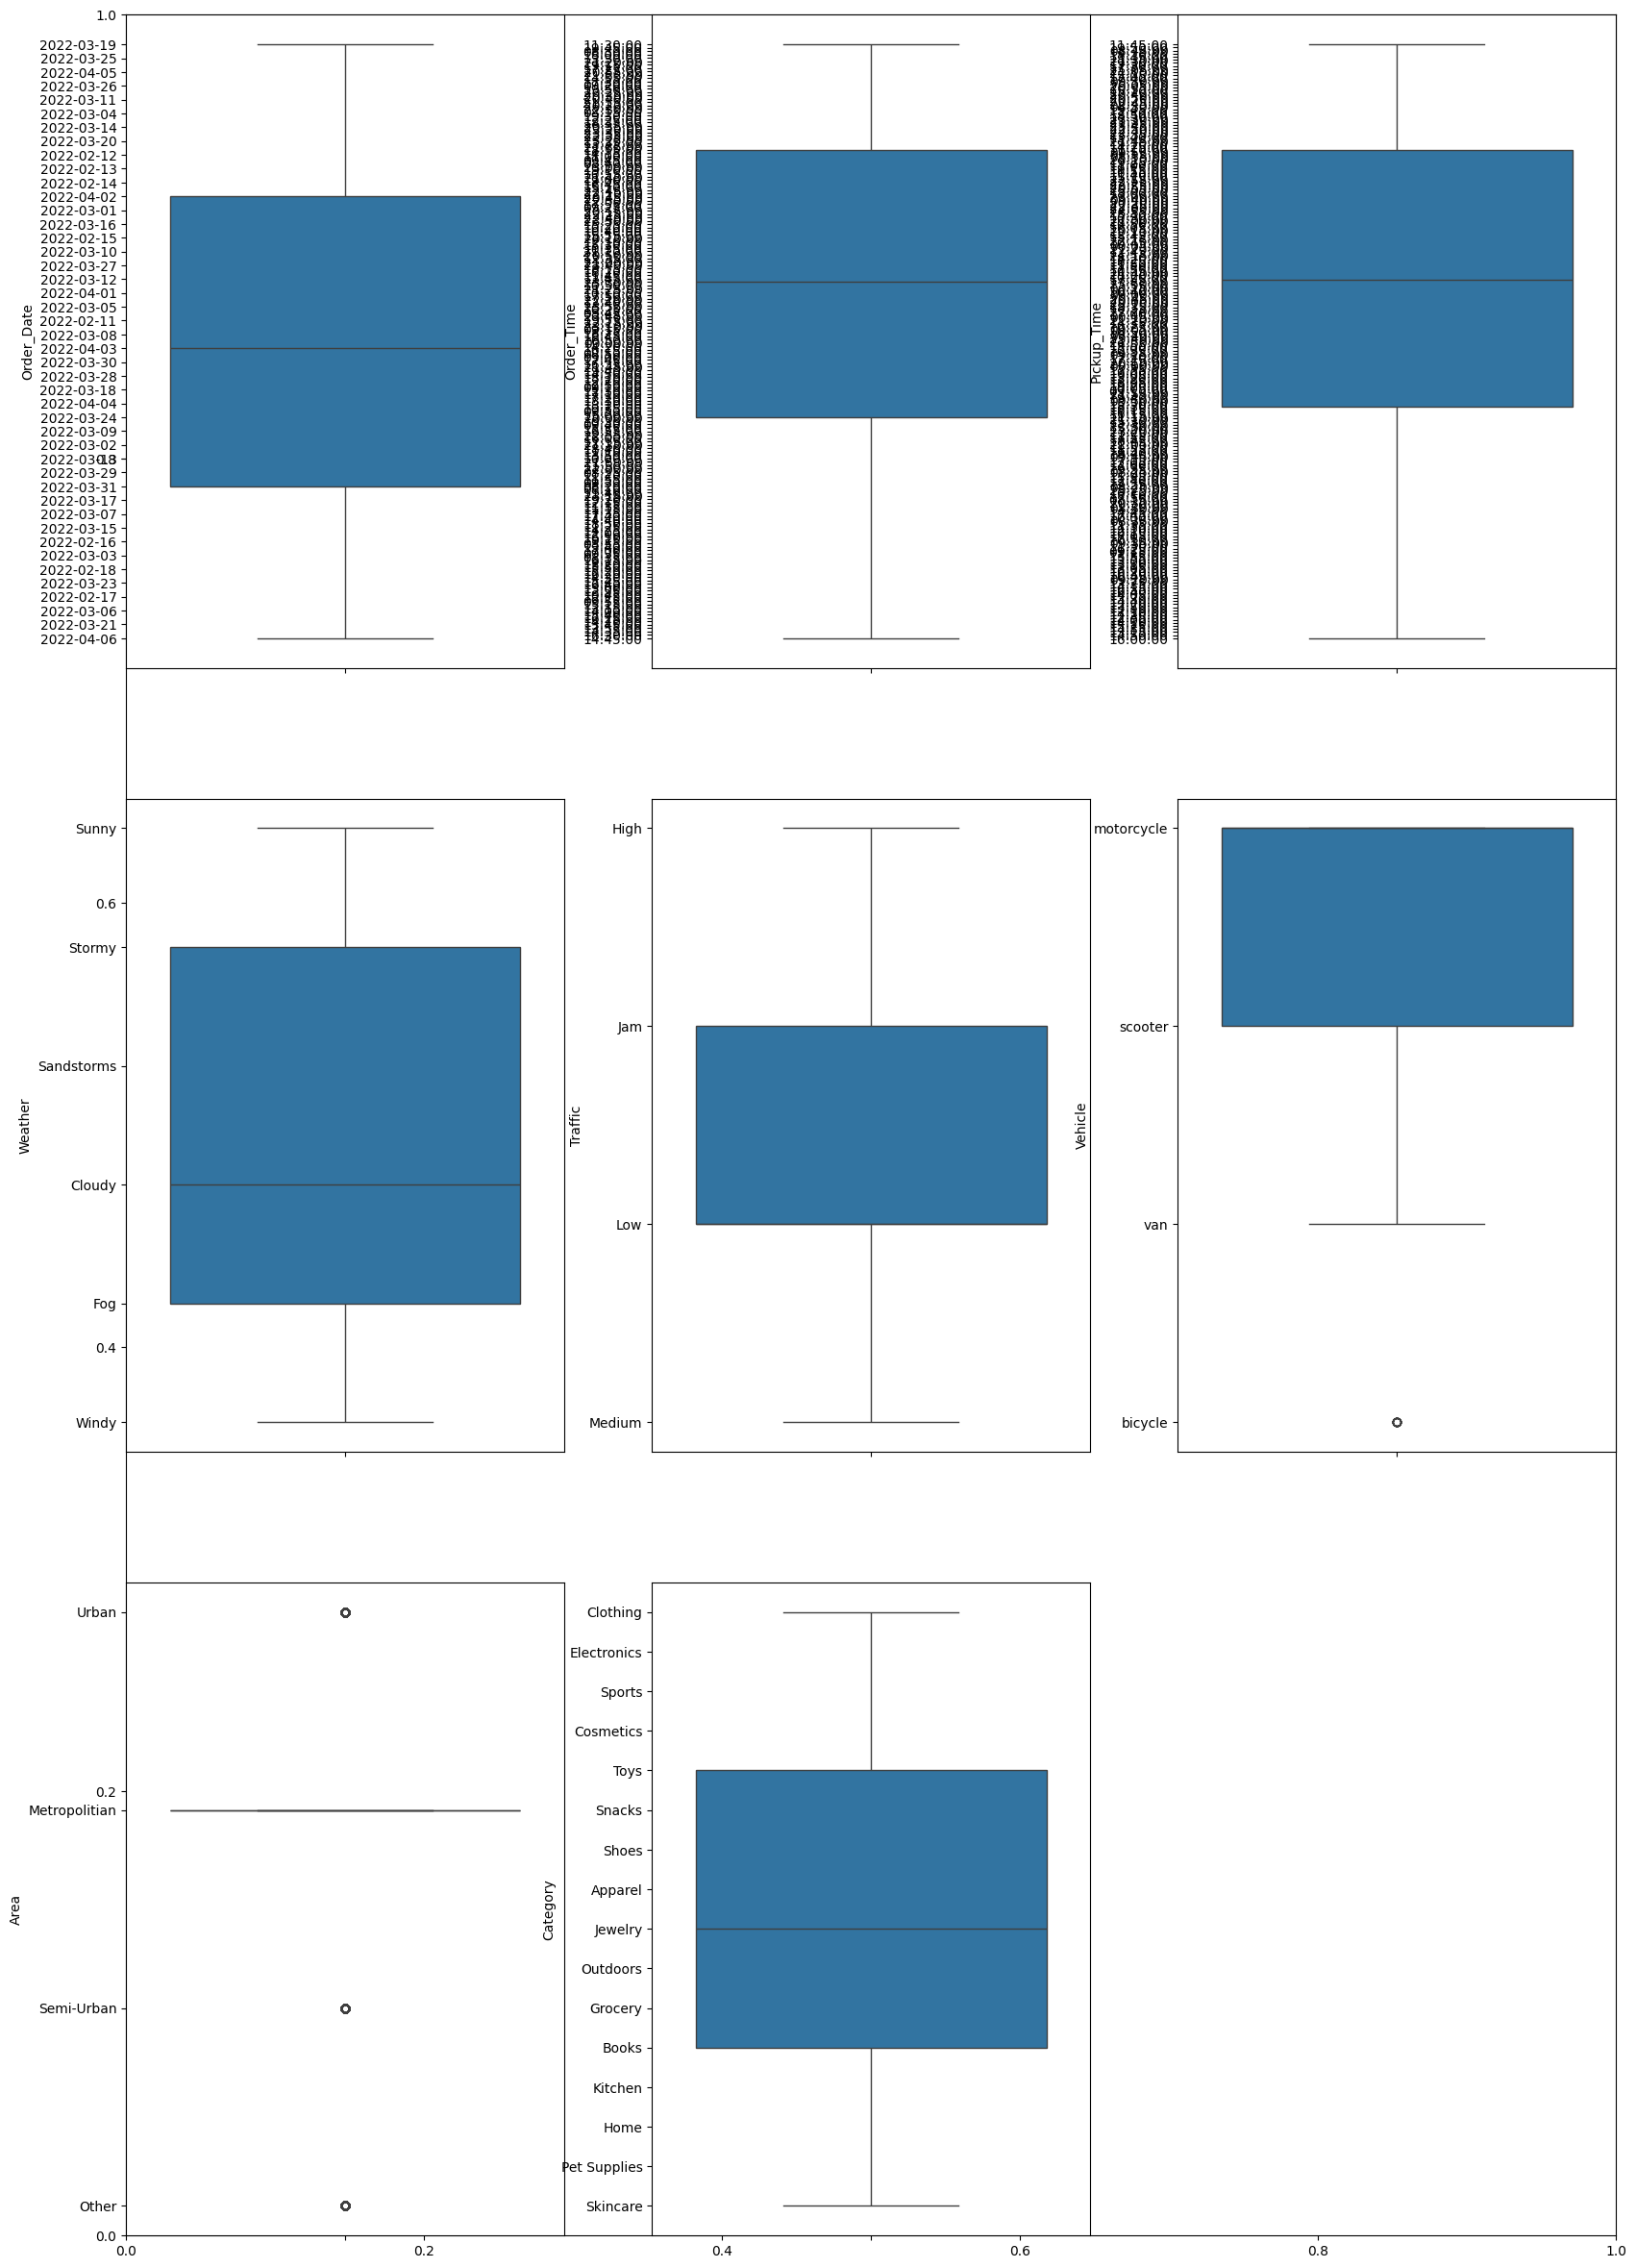

In [305]:
plt.subplots(figsize=(20, 30))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(amazon[['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category']].shape[1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(amazon[['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category']].iloc[:, i])
plt.show()

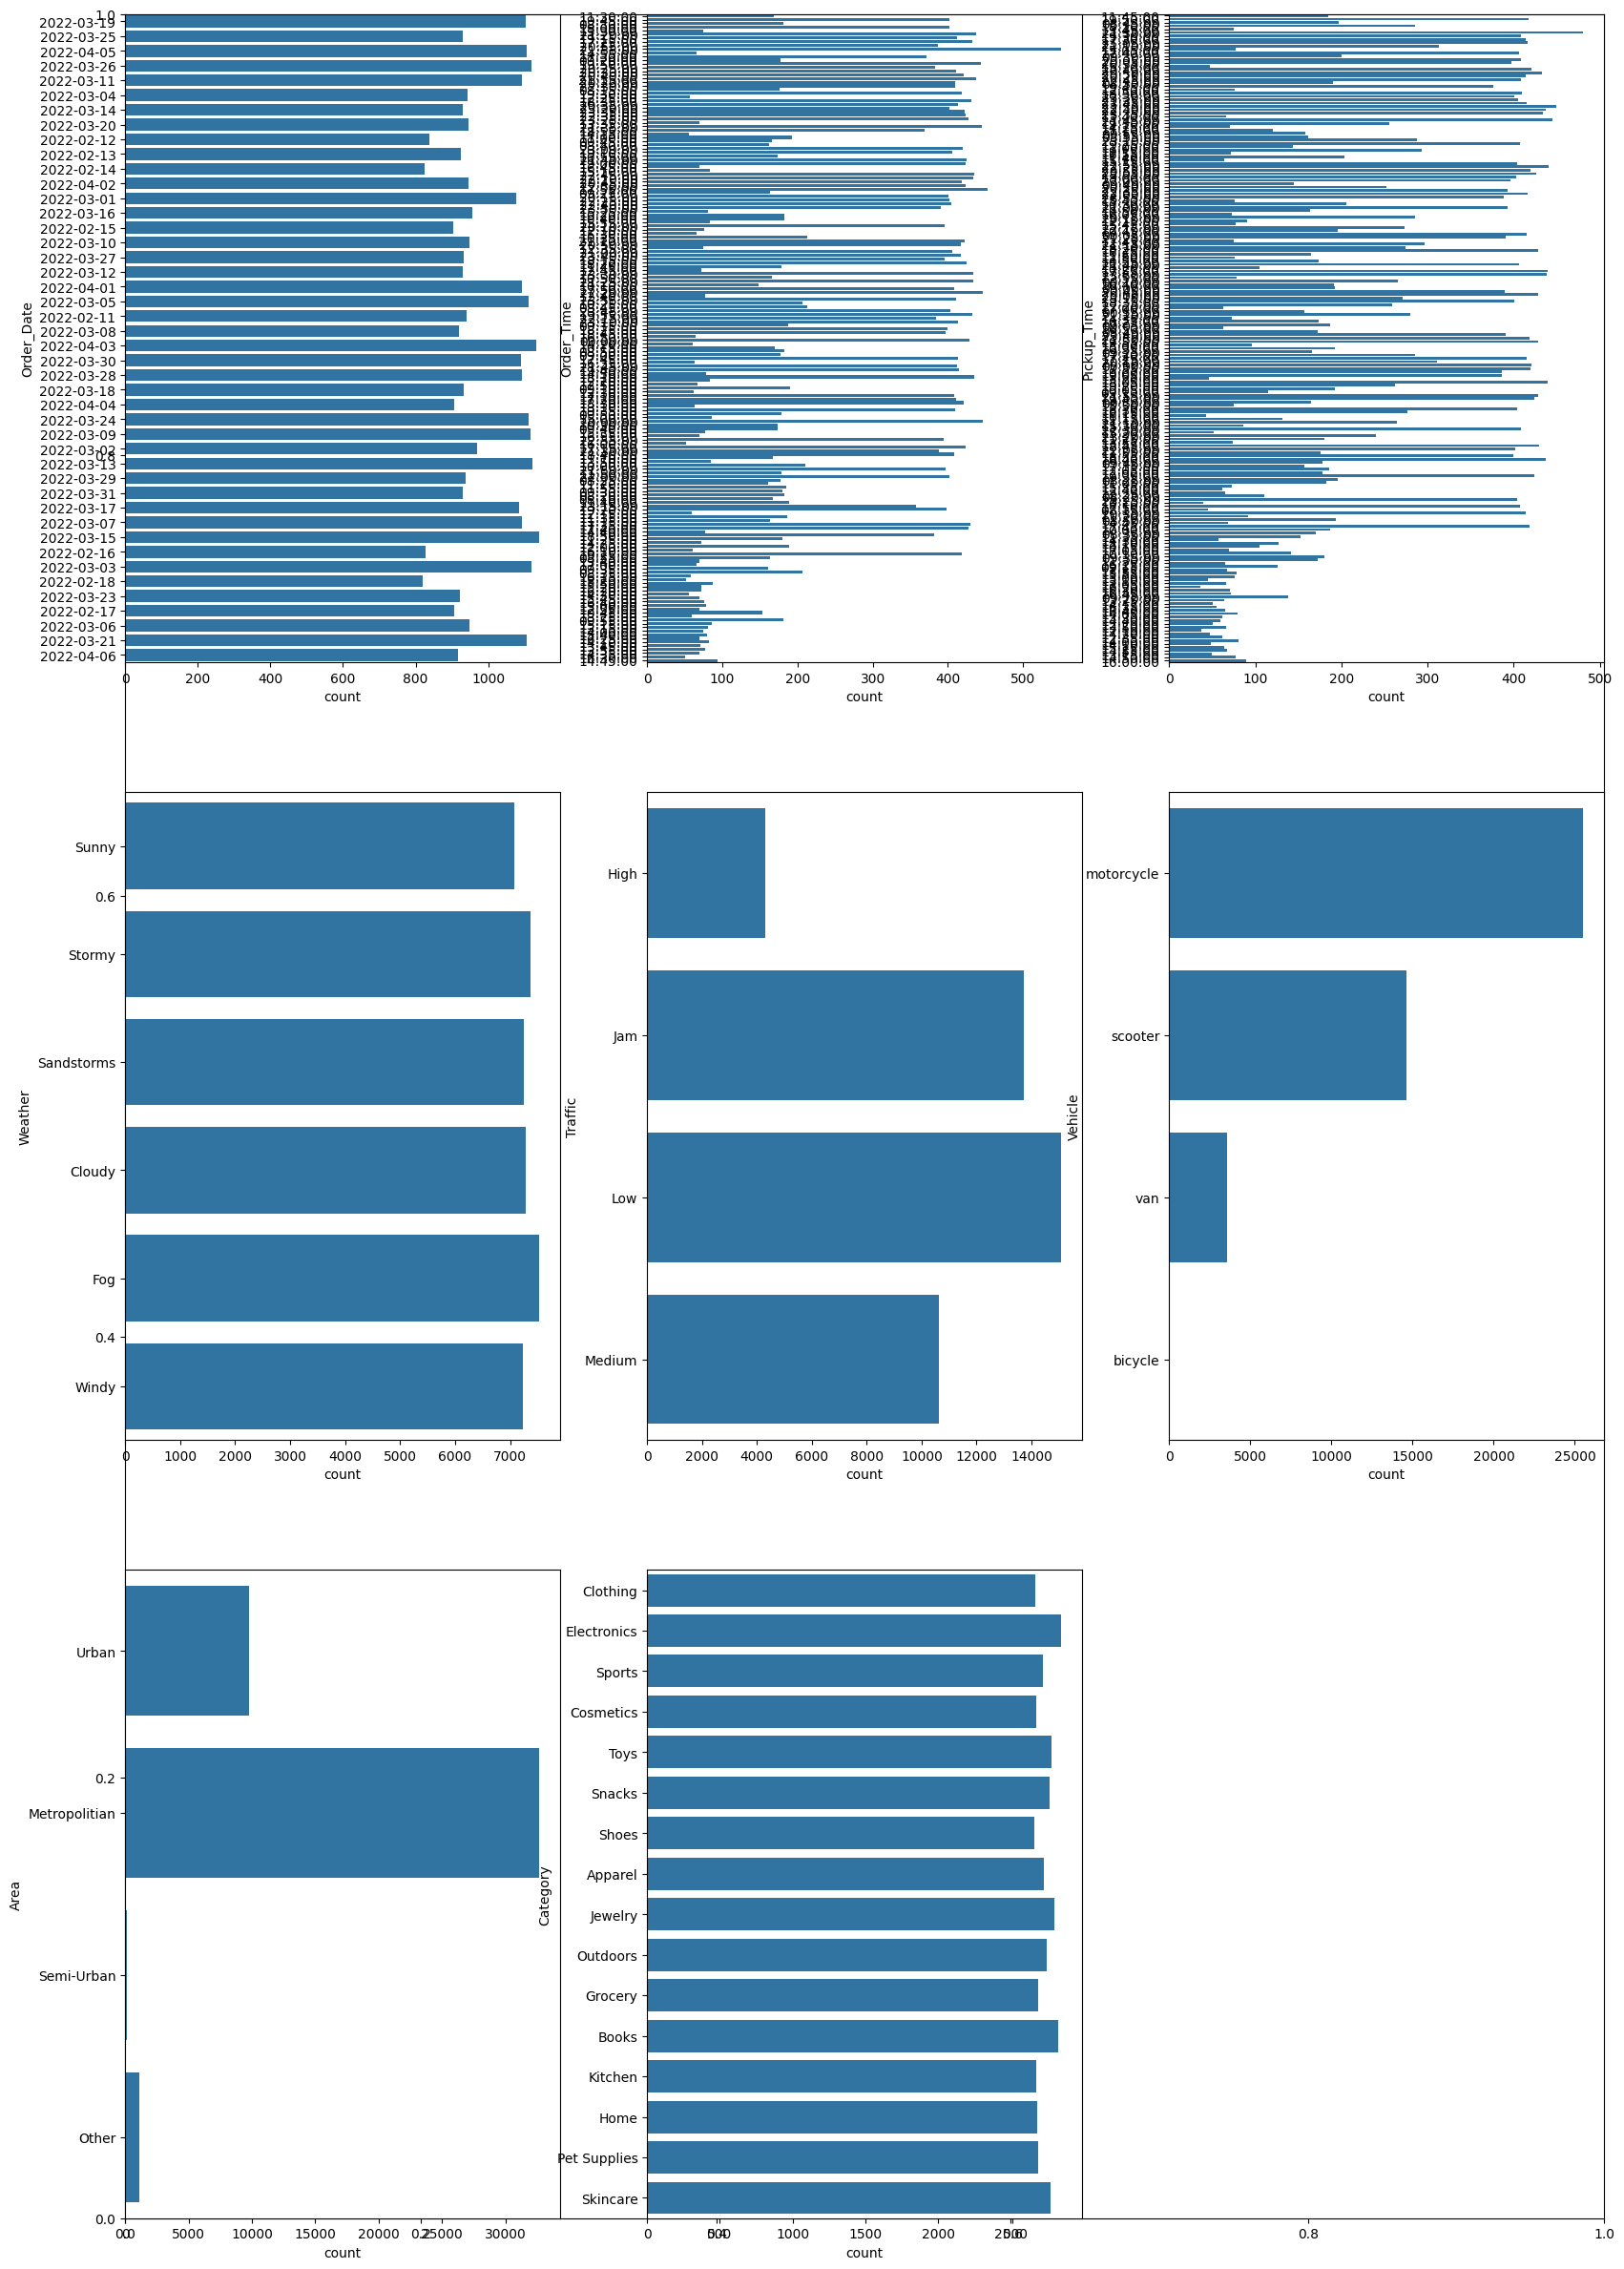

In [306]:
plt.subplots(figsize=(20, 30))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(amazon[['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category']].shape[1]):
    plt.subplot(3, 3, i+1)
    sns.countplot(amazon[['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category']].iloc[:, i])
plt.show()

In [307]:
len(float_columns)

5

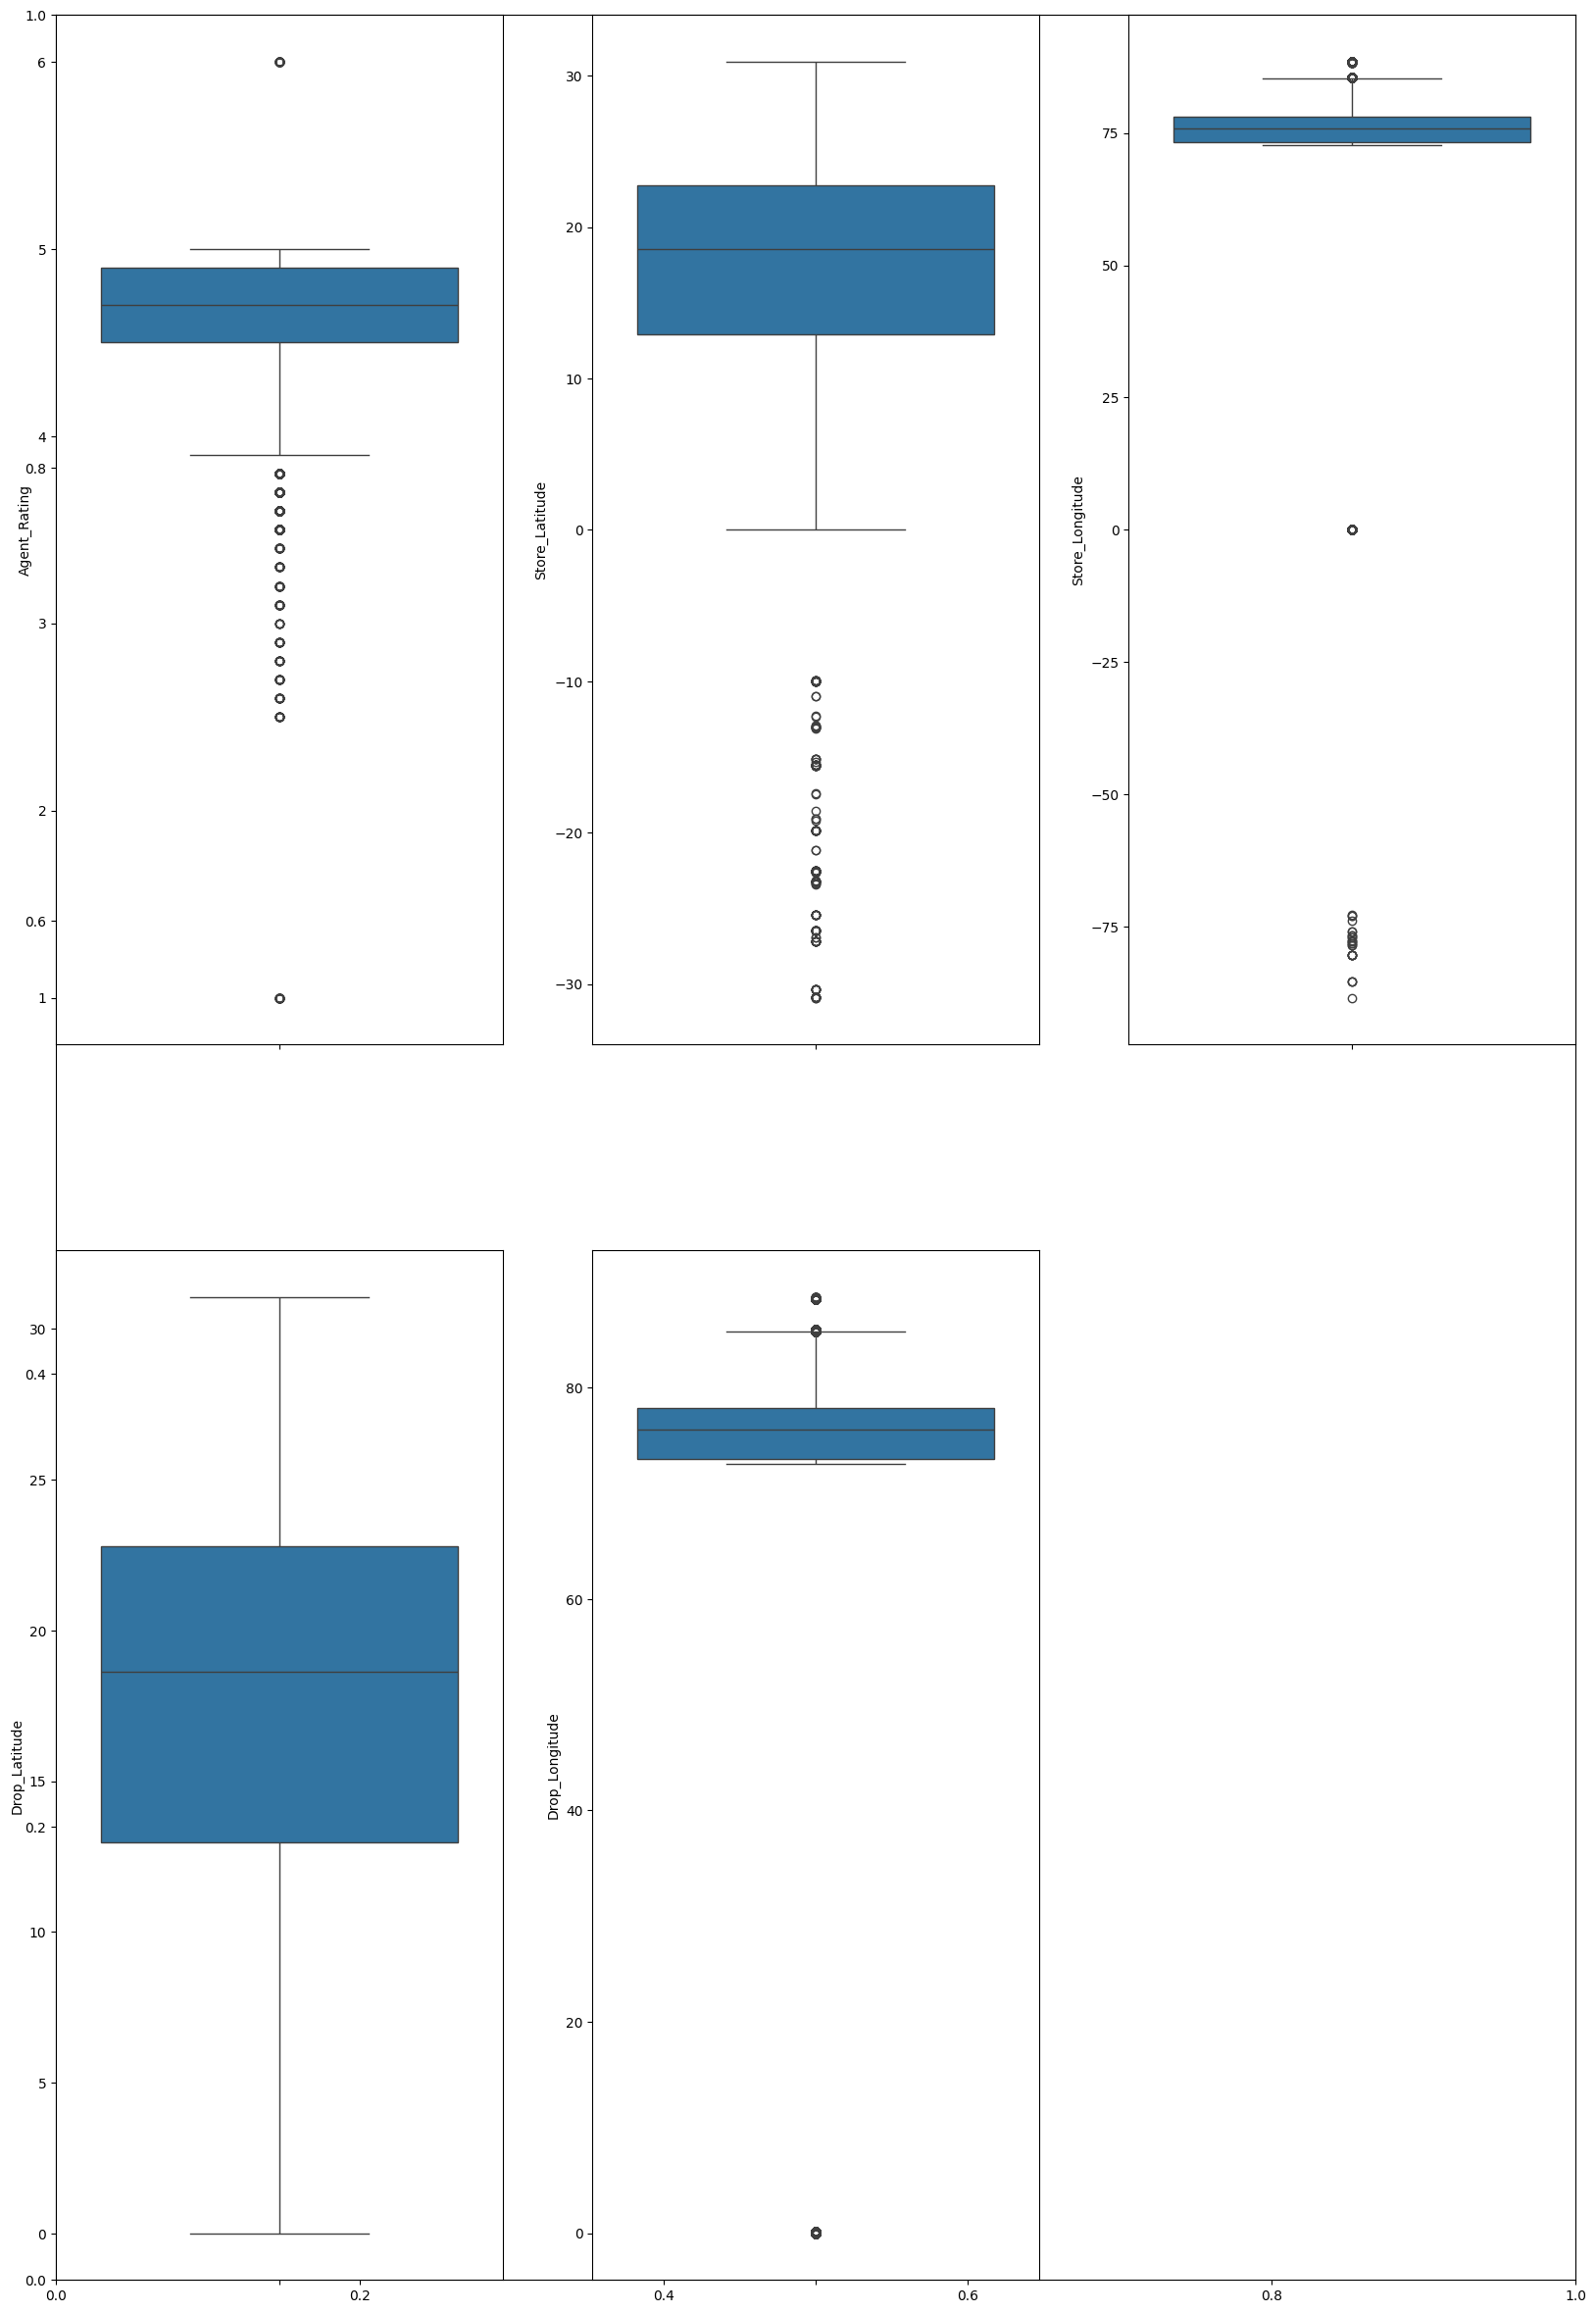

In [308]:
plt.subplots(figsize=(20, 30))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(amazon[float_columns].shape[1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(amazon[float_columns].iloc[:, i])
plt.show()

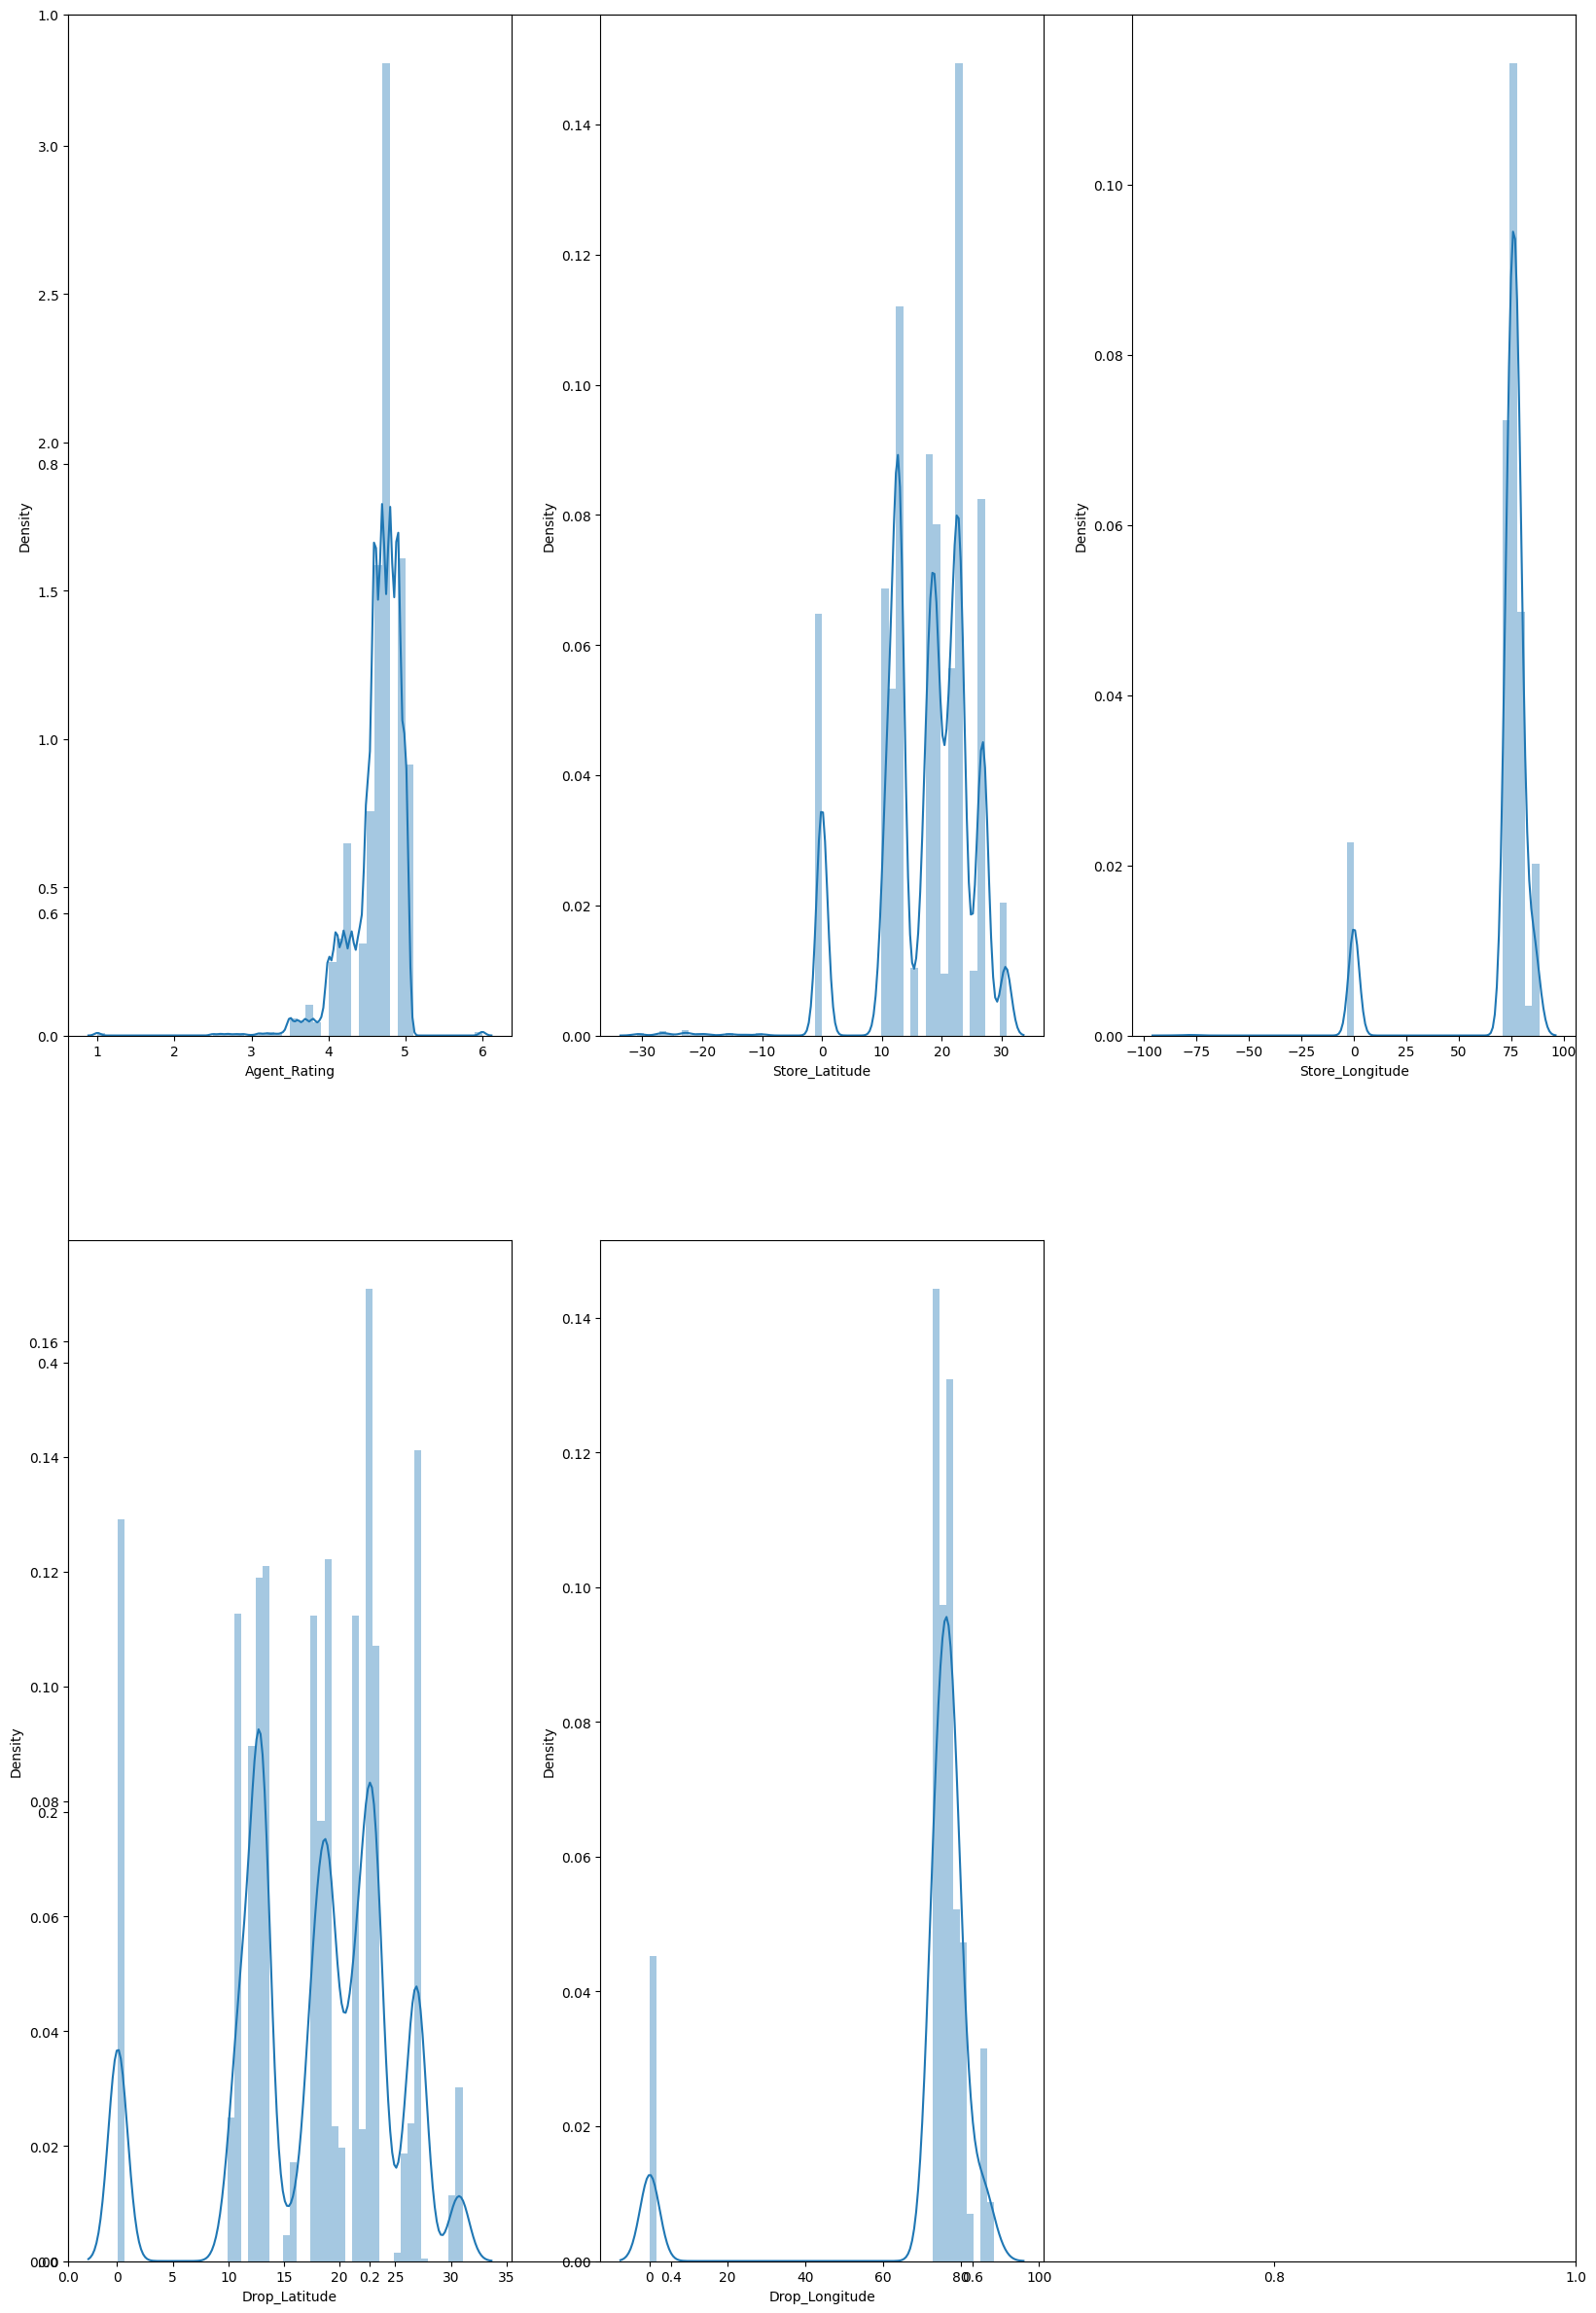

In [309]:
plt.subplots(figsize=(20, 30))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(amazon[float_columns].shape[1]):
    plt.subplot(2, 3, i+1)
    sns.distplot(amazon[float_columns].iloc[:, i])
plt.show()

In [310]:
amazon.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


Cleaning and Correction of Columns

In [311]:
import numpy as np

def haversine_vectorized(lat1, lon1, lat2, lon2):
    """
    Vectorized haversine distance (works on pandas Series / numpy arrays).
    Returns distance in kilometers.
    'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'
    """
    R = 6371  # Earth radius in km

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


In [312]:
amazon.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [313]:
amazon[ ['Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']].describe()

,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude
count,43739.000000,43739.000000,43739.000000,43739.000000
mean,17.210960,70.661177,17.459031,70.821842
std,7.764225,21.475005,7.342950,21.153148
min,-30.902872,-88.366217,0.010000,0.010000
25%,12.933298,73.170283,12.985996,73.280000
50%,18.551440,75.898497,18.633626,76.002574
75%,22.732225,78.045359,22.785049,78.104095
max,30.914057,88.433452,31.054057,88.563452


In [314]:
distance_columns=['Store_Latitude','Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']

In [315]:
amazon["Distance_km"]=haversine_vectorized(amazon['Store_Latitude'],amazon['Store_Longitude'],amazon['Drop_Latitude'],amazon['Drop_Longitude'])

In [316]:
amazon["Distance_km"].describe()

count    43739.000000
mean        38.561752
std        534.564299
min          1.465067
25%          4.663432
50%          9.220450
75%         13.682379
max      19692.674606
Name: Distance_km, dtype: float64

In [317]:
amazon[amazon["Distance_km"]>200]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
90,hnme204254454,34,4.7,-27.163303,78.057044,27.233303,78.127044,2022-02-16,23:00:00,23:05:00,Sandstorms,Low,scooter,Metropolitian,75,Clothing,6048.631240
275,mctx146223837,32,4.7,-27.165108,78.015053,27.225108,78.075053,2022-02-13,20:55:00,21:10:00,Sandstorms,Jam,scooter,Metropolitian,155,Clothing,6047.919478
1045,jxrf169692899,20,4.7,-15.546594,73.760431,15.606594,73.820431,2022-02-13,20:00:00,20:10:00,Cloudy,Jam,motorcycle,Metropolitian,145,Toys,3464.082720
1705,csyn869746139,39,4.5,-23.230791,77.437020,23.250791,77.457020,2022-02-13,09:15:00,09:20:00,Cloudy,Low,motorcycle,Metropolitian,145,Books,5168.516553
1893,bocx711605816,25,4.0,-22.539129,88.365507,22.549129,88.375507,2022-02-15,09:25:00,09:30:00,Sandstorms,Low,motorcycle,Metropolitian,95,Toys,5013.585658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42071,lzux792298119,32,4.6,-15.498603,73.826911,15.568603,73.896911,2022-02-18,23:10:00,23:15:00,Sandstorms,Low,motorcycle,Metropolitian,120,Toys,3454.524245
42252,lpkh473392828,22,5.0,-15.157944,73.950889,15.217944,74.010889,2022-02-17,18:50:00,18:55:00,Sandstorms,Medium,scooter,Metropolitian,135,Sports,3377.651072
42824,nnam562968751,23,4.8,-9.982834,76.283268,10.072834,76.373268,2022-02-14,19:20:00,19:35:00,Sunny,Jam,motorcycle,Metropolitian,105,Sports,2230.110757
43105,pvcj122440792,30,4.9,-19.874733,75.353942,19.904733,75.383942,2022-02-15,22:20:00,22:35:00,Fog,Low,motorcycle,Metropolitian,75,Pet Supplies,4423.276011


In [318]:
amazon[amazon["Store_Latitude"]<0][["Store_Latitude","Store_Longitude"]]

,Store_Latitude,Store_Longitude
90,-27.163303,78.057044
275,-27.165108,78.015053
1045,-15.546594,73.760431
1705,-23.230791,77.437020
1893,-22.539129,88.365507
...,...,...
42071,-15.498603,73.826911
42252,-15.157944,73.950889
42824,-9.982834,76.283268
43105,-19.874733,75.353942


***Tried checking for Negative Longitude and latitude on Maps Unable to get any Proper address Hence came to conclusion that Negative Values are Incorrect However when changed negative values to Positive it is able to locate exact location within India***

In [319]:
amazon["Store_Latitude"].value_counts()

Store_Latitude
 0.000000     3505
 26.911378     175
 26.914142     174
 26.902908     171
 26.902328     170
              ... 
-26.470000       1
-25.443994       1
-12.939496       1
-15.498603       1
-19.874733       1
Name: count, Length: 521, dtype: int64

In [320]:
amazon[amazon["Store_Latitude"]==0]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
33,zotl583816092,32,3.5,0.0,0.0,0.11,0.11,2022-03-08,21:35:00,21:45:00,Stormy,Jam,scooter,Urban,35,Grocery,17.297866
51,dcdm719150402,25,5.0,0.0,0.0,0.03,0.03,2022-02-13,22:10:00,22:25:00,Cloudy,Low,motorcycle,Metropolitian,75,Home,4.717601
56,bbow373480117,39,4.2,0.0,0.0,0.08,0.08,2022-03-02,20:35:00,20:50:00,Fog,Jam,scooter,Semi-Urban,245,Apparel,12.580268
58,etss702593505,36,4.7,0.0,0.0,0.06,0.06,2022-03-13,20:15:00,20:20:00,Cloudy,Jam,motorcycle,Metropolitian,150,Sports,9.435202
66,emlt327861941,23,4.8,0.0,0.0,0.02,0.02,2022-03-07,10:40:00,10:50:00,Stormy,Low,scooter,Metropolitian,15,Grocery,3.145067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,lzan335958845,26,4.9,0.0,0.0,0.07,0.07,2022-03-10,19:35:00,19:45:00,Fog,Jam,scooter,Metropolitian,32,Grocery,11.007735
43722,gbvc892665917,34,4.2,0.0,0.0,0.13,0.13,2022-04-04,17:25:00,17:30:00,Stormy,Medium,motorcycle,Urban,240,Clothing,20.442930
43723,xczj095858269,25,4.7,0.0,0.0,0.09,0.09,2022-03-29,22:10:00,22:15:00,Cloudy,Low,motorcycle,Metropolitian,105,Shoes,14.152801
43725,wjsq095299773,32,4.6,0.0,0.0,0.05,0.05,2022-02-15,18:10:00,18:20:00,Stormy,Medium,scooter,Metropolitian,135,Skincare,7.862668


In [321]:
amazon["Store_Longitude"].value_counts()

Store_Longitude
 0.000000     3505
 75.789034     175
 75.805704     174
 75.792934     171
 75.794257     170
              ... 
-85.335486       1
-72.814492       1
-77.645748       1
-80.242268       1
-80.318656       1
Name: count, Length: 415, dtype: int64

In [322]:
amazon[amazon["Store_Longitude"]<0]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,21:55:00,12:30:00,Fog,Low,van,Urban,125,Cosmetics,17343.331418
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,21:55:00,23:20:00,Fog,Low,bicycle,Metropolitian,135,Jewelry,17565.024412
4958,tznn437423907,50,6.0,-26.910262,-75.783013,27.020262,75.893013,2022-03-18,21:55:00,18:50:00,Fog,Low,scooter,Metropolitian,100,Skincare,17213.974705
5418,jzlx800086920,50,6.0,-27.159795,-78.042990,27.209795,78.092990,2022-02-13,21:55:00,18:05:00,Fog,Low,scooter,Metropolitian,100,Electronics,17658.249697
6741,tvsb800453924,50,6.0,-12.352058,-76.606650,12.372058,76.626650,2022-03-15,21:55:00,10:00:00,Fog,Low,scooter,Metropolitian,70,Clothing,17109.010270
9148,jysr585437673,50,6.0,-23.374989,-85.335486,23.444989,85.405486,2022-03-20,21:55:00,17:55:00,Fog,Low,bicycle,Metropolitian,160,Home,19070.408110
10687,wxzn327559387,15,1.0,-21.183434,-72.814492,21.193434,72.824492,2022-03-05,21:55:00,11:30:00,Fog,Low,scooter,Urban,135,Jewelry,16459.806880
13106,giiq483839538,50,6.0,-23.416792,-85.316842,23.466792,85.366842,2022-03-13,21:55:00,20:40:00,Fog,Low,motorcycle,Metropolitian,140,Outdoors,19064.810117
17023,rjyy374079991,50,6.0,-13.066762,-80.251865,13.076762,80.261865,2022-03-17,21:55:00,09:15:00,Fog,Low,van,Metropolitian,100,Kitchen,17904.984643
18631,kkex403947052,50,6.0,-22.651847,-75.881991,22.711847,75.941991,2022-03-05,21:55:00,19:30:00,Fog,Low,bicycle,Metropolitian,150,Toys,17128.776780


In [323]:
amazon['Store_Longitude']=amazon['Store_Longitude'].abs()

In [324]:
amazon[amazon["Store_Longitude"]<0]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km


In [325]:
amazon['Store_Latitude']=amazon['Store_Latitude'].abs()

As Latitude and Longitude Negative values changed to Positive. Recalculating the distance

In [326]:
amazon["Distance_km"]=haversine_vectorized(amazon['Store_Latitude'],amazon['Store_Longitude'],amazon['Drop_Latitude'],amazon['Drop_Longitude'])

In [327]:
amazon["Distance_km"].describe()

count    43739.000000
mean         9.732784
std          5.603677
min          1.465067
25%          4.663412
50%          9.220148
75%         13.681379
max         20.969489
Name: Distance_km, dtype: float64

<Axes: >

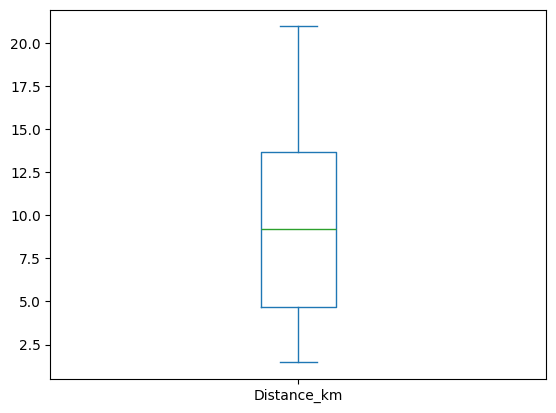

In [328]:
amazon["Distance_km"].plot(kind="box")

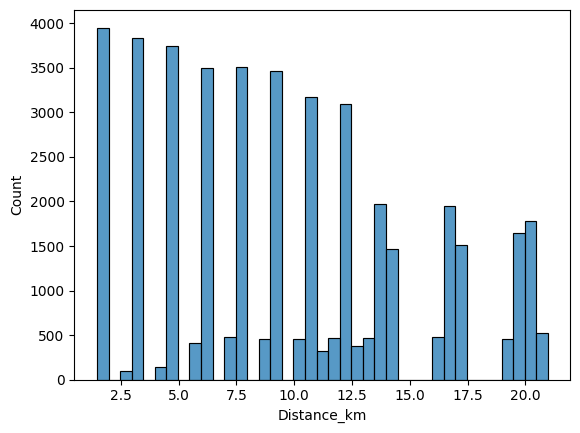

In [329]:
sns.histplot(amazon.Distance_km);

In [330]:
amazon

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.489846
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007735
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.657195
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.232393


In [331]:
amazon["Order_Time"] = pd.to_datetime(amazon["Order_Time"], format="%H:%M:%S").dt.time
amazon["Pickup_Time"] = pd.to_datetime(amazon["Pickup_Time"], format="%H:%M:%S").dt.time


In [332]:
def delay(df):
    order_min = df["Order_Time"].apply(lambda x: x.hour * 60 + x.minute)
    pickup_min = df["Pickup_Time"].apply(lambda x: x.hour * 60 + x.minute)
    
    delays = pickup_min - order_min
    # Fix negative delays (crossing midnight)
    delays = delays.apply(lambda x: x if x >= 0 else x + 24*60)
    
    return delays

In [333]:
amazon["Delay"]=delay(amazon)

In [334]:
amazon

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,15
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.489846,10
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007735,15
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.657195,15
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.232393,5


In [335]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43739 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43739 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
 16  Distance_km      43739 non-null  float64
 17  Delay       

In [336]:
pd.to_datetime(amazon["Order_Time"].astype(str)).dt.hour

0        11
1        19
2         8
3        18
4        13
         ..
43734    11
43735    19
43736    23
43737    13
43738    17
Name: Order_Time, Length: 43739, dtype: int32

In [337]:
amazon["Delay"].describe()

count    43739.000000
mean        11.731064
std         45.114808
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max       1435.000000
Name: Delay, dtype: float64

In [338]:
amazon[amazon["Delay"]>=55]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay
2286,xige084493792,15,1.0,26.891191,75.802083,26.981191,75.892083,2022-03-12,21:55:00,17:20:00,Fog,Low,motorcycle,Urban,75,Home,13.407093,1165
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,21:55:00,20:30:00,Fog,Low,scooter,Metropolitian,145,Kitchen,9.074684,1355
3438,nzsa056960624,50,6.0,12.970324,77.645748,13.010324,77.685748,2022-03-13,21:55:00,12:30:00,Fog,Low,van,Urban,125,Cosmetics,6.210168,875
4514,eids248121351,50,6.0,17.451976,78.385883,17.561976,78.495883,2022-04-04,21:55:00,23:20:00,Fog,Low,bicycle,Metropolitian,135,Jewelry,16.902002,85
4958,tznn437423907,50,6.0,26.910262,75.783013,27.020262,75.893013,2022-03-18,21:55:00,18:50:00,Fog,Low,scooter,Metropolitian,100,Skincare,16.384574,1255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,21:55:00,20:40:00,Fog,Low,scooter,Metropolitian,140,Apparel,4.537553,1365
41088,wgdm794380305,50,6.0,12.939496,77.625999,12.949496,77.635999,2022-03-19,21:55:00,09:40:00,Fog,Low,van,Metropolitian,95,Books,1.552681,705
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,21:55:00,17:40:00,Fog,Low,scooter,Metropolitian,170,Jewelry,11.007735,1185
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,21:55:00,18:00:00,Fog,Low,van,Urban,130,Jewelry,20.176709,1205


In [339]:
def get_part_of_day(amazon):
    hour=pd.to_datetime(amazon["Pickup_Time"].astype(str)).dt.hour
    #hour=pd.DataFrame({"Pickup_Hour":hour})
    hour=pd.cut(hour,bins=[0, 5, 12, 17, 21, 24],labels=["Night", "Morning", "Afternoon", "Evening", "Night"],right=False, ordered=False)
    return hour

In [340]:
get_part_of_day(amazon)

0          Morning
1          Evening
2          Morning
3          Evening
4        Afternoon
           ...    
43734      Morning
43735      Evening
43736        Night
43737    Afternoon
43738      Evening
Name: Pickup_Time, Length: 43739, dtype: category
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [341]:
amazon["Pickup_day_part"]=get_part_of_day(amazon)

In [342]:
amazon.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Pickup_day_part
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,Morning
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,Evening


In [343]:
string_columns=['Weather','Traffic','Vehicle','Area','Category','Pickup_day_part']

In [344]:
amazon["Order_day"]=pd.to_datetime(amazon['Order_Date'],infer_datetime_format=True).dt.day_of_week

In [345]:
amazon.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Pickup_day_part,Order_day
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,Morning,5
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,Evening,4


In [346]:
amazon["Order_month"]=pd.to_datetime(amazon['Order_Date'],infer_datetime_format=True).dt.month

In [347]:
pd.to_datetime(amazon['Order_Date'],infer_datetime_format=True).dt.year.unique()

array([2022], dtype=int32)

In [348]:
amazon.groupby("Order_day")["Delivery_Time"].mean()

Order_day
0    124.785186
1    120.252137
2    131.671128
3    119.771691
4    126.893661
5    124.985447
6    124.976690
Name: Delivery_Time, dtype: float64

***This Confirms that We have only 3 months of data for year 2022***

## EDA

### UBM (Univariate)

In [349]:
amazon.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Pickup_day_part,Order_day,Order_month
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,High,motorcycle,Urban,120,Clothing,3.025149,15,Morning,5,3
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,Evening,4,3
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Low,motorcycle,Urban,130,Sports,1.552758,15,Morning,5,3
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10,Evening,1,4
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,High,scooter,Metropolitian,150,Toys,6.210138,15,Afternoon,5,3


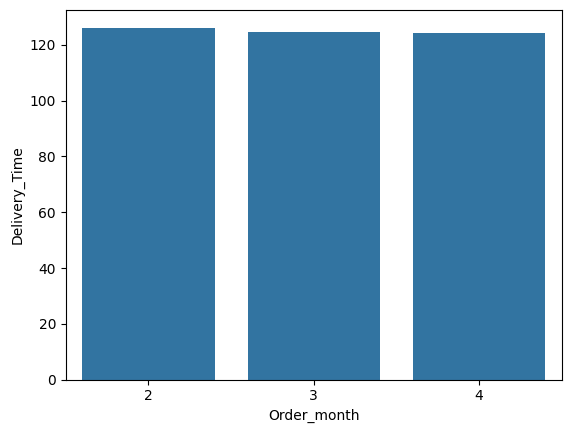

In [350]:
sns.barplot(amazon.groupby("Order_month")["Delivery_Time"].mean());
# this Confirms that We have only 3 months of data for year 2022

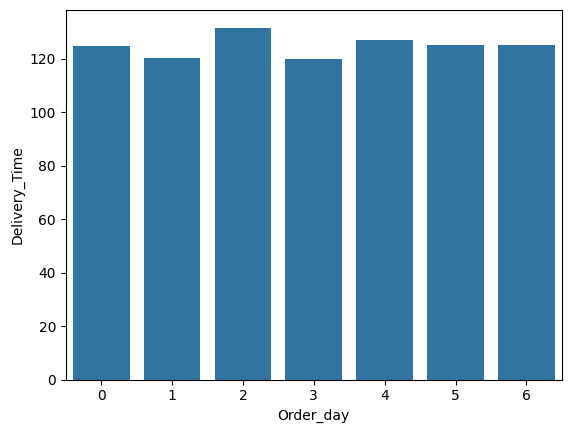

In [351]:
sns.barplot(amazon.groupby("Order_day")["Delivery_Time"].mean());

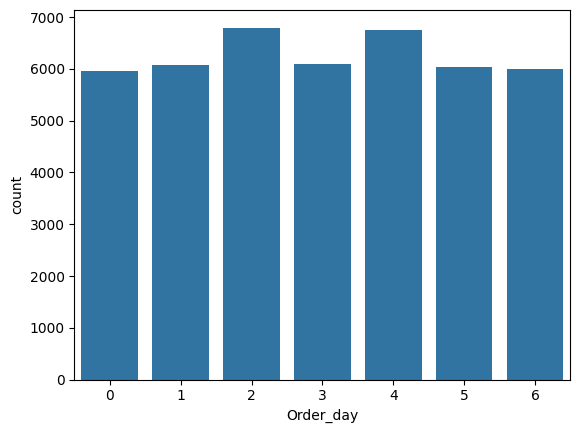

In [352]:
sns.barplot(amazon["Order_day"].value_counts());

In [353]:
amazon.select_dtypes("object").columns

Index(['Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather',
       'Traffic', 'Vehicle', 'Area', 'Category'],
      dtype='object')

In [354]:
object_columns= amazon.select_dtypes("object").columns
float_columns = amazon.select_dtypes("float").columns
int_columns = amazon.select_dtypes("int").columns

In [355]:
string_columns

['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Pickup_day_part']

In [356]:
amazon[object_columns]

,Order_ID,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Category
0,ialx566343618,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,Clothing
1,akqg208421122,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,Electronics
2,njpu434582536,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,Sports
3,rjto796129700,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,Cosmetics
4,zguw716275638,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,Toys
...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,Home
43735,aevx342135787,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,Jewelry
43736,xnek760674819,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,Home
43737,cynl434665991,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,Kitchen


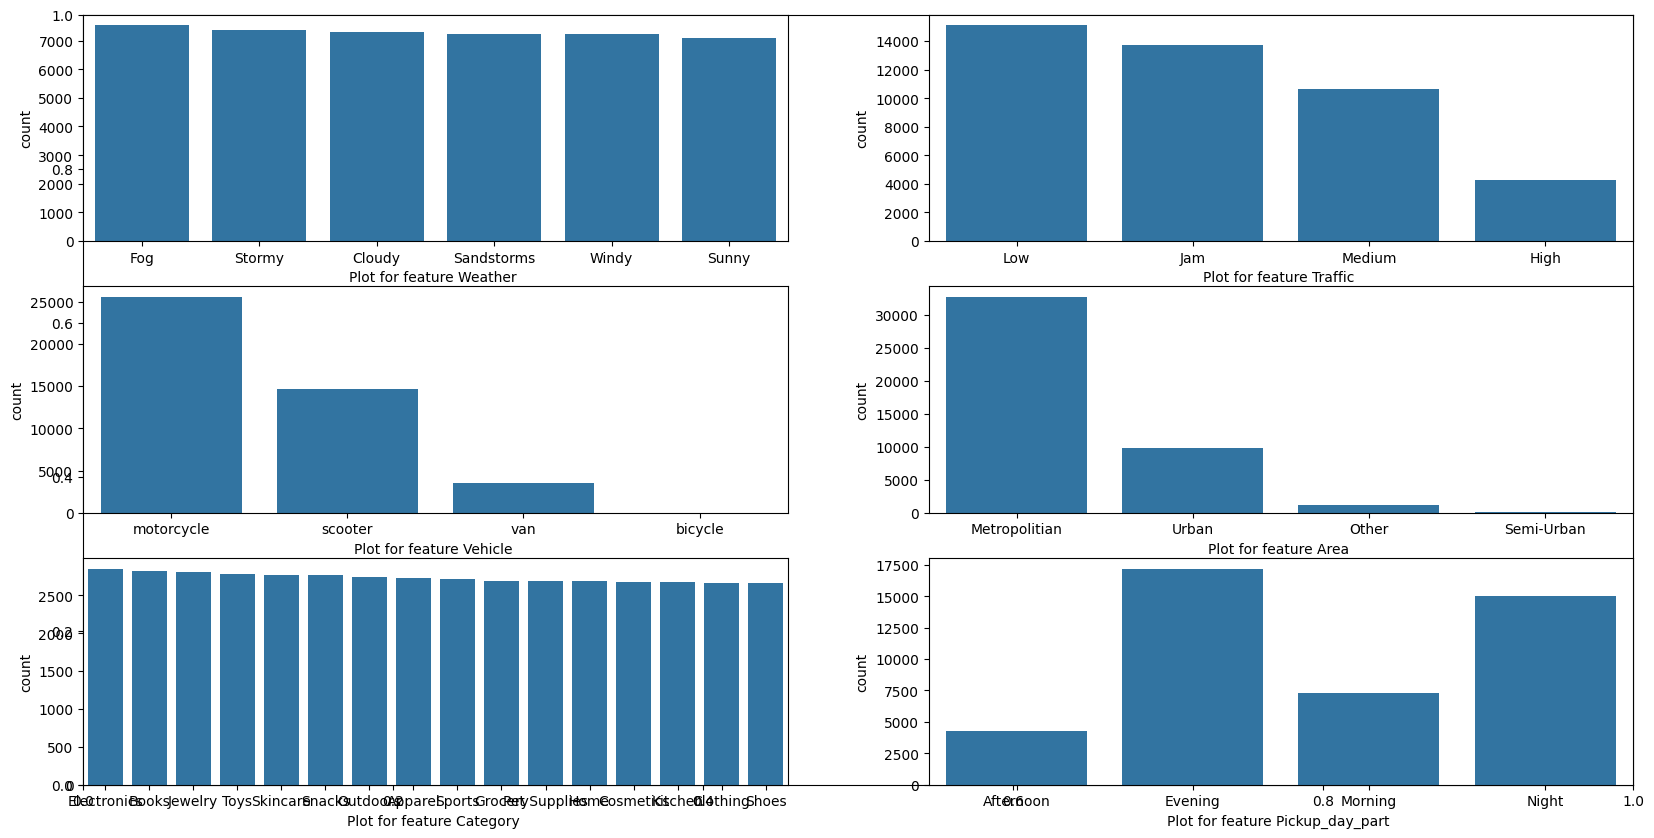

In [357]:
plt.subplots(figsize=(20,10))
j=1
for i in string_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.barplot(amazon[i].value_counts())
    j+=1
plt.show()

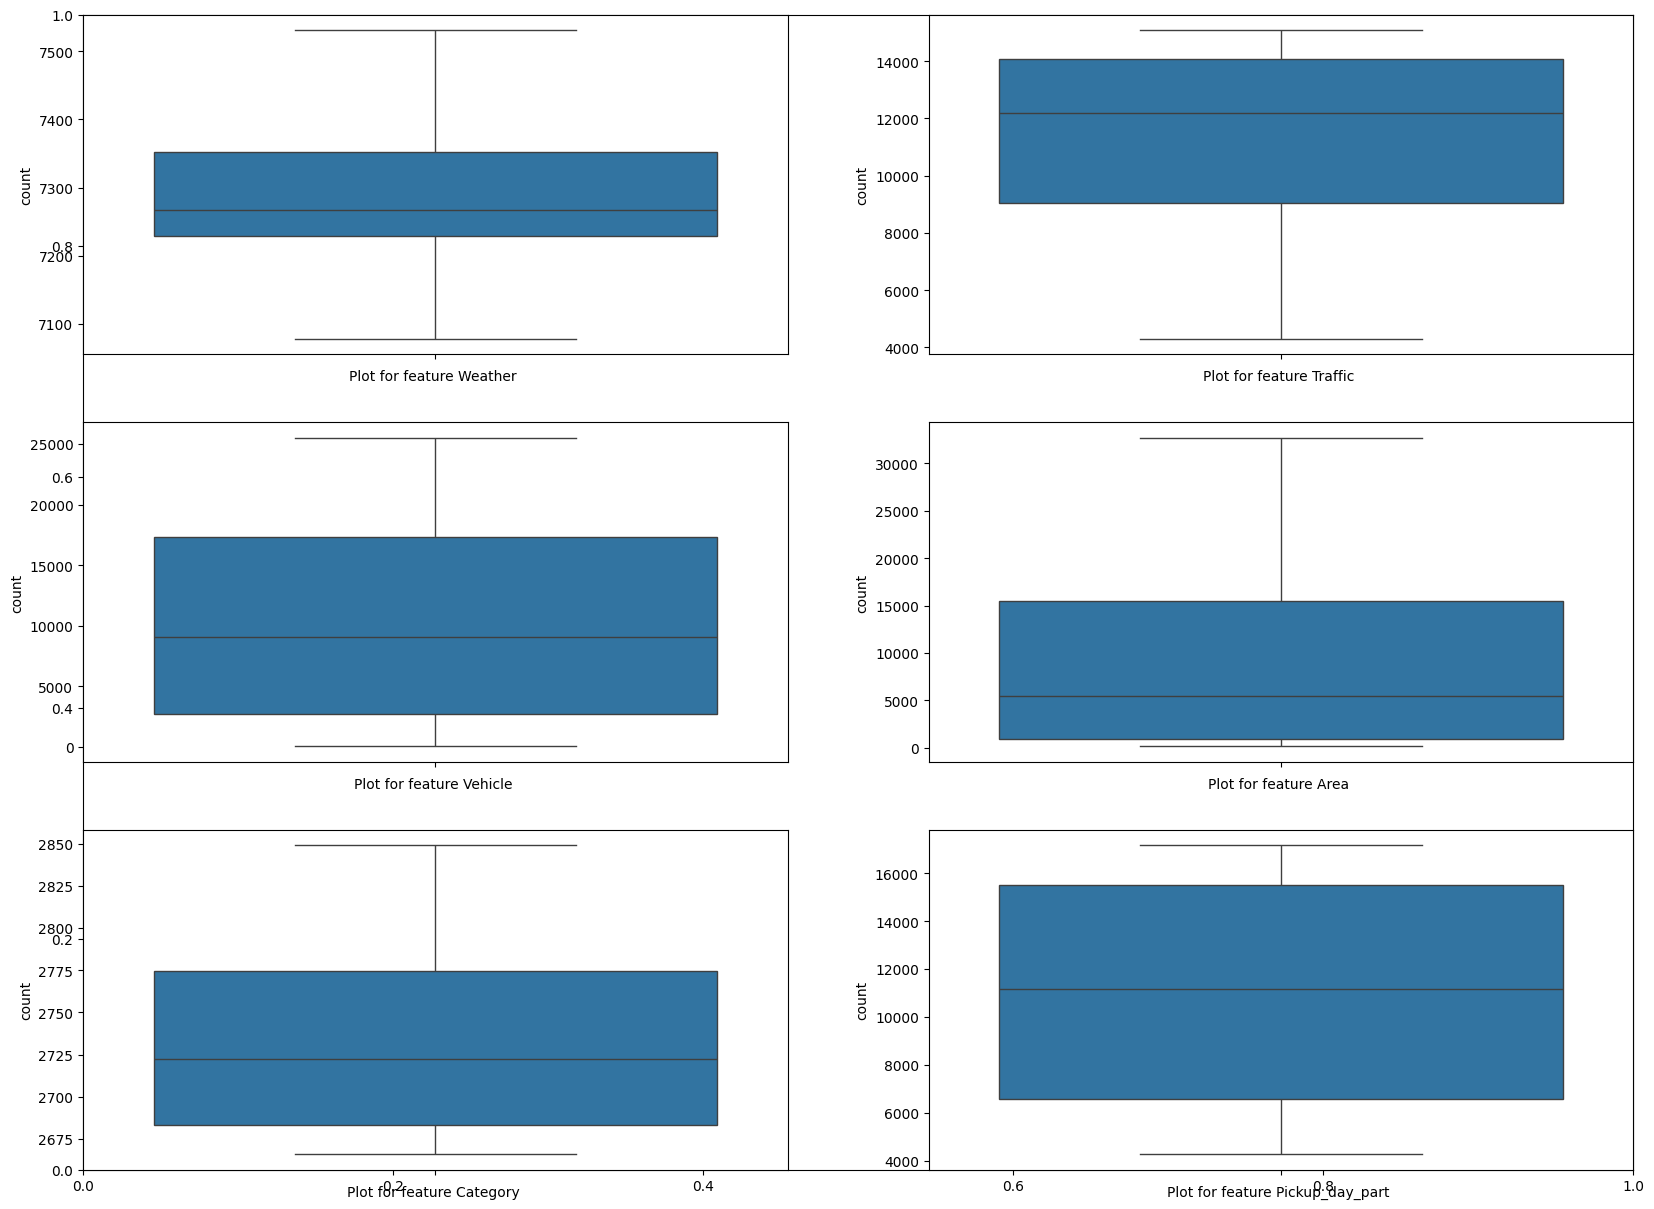

In [358]:
plt.subplots(figsize=(20,15))
j=1
for i in string_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.boxplot(amazon[i].value_counts())
    j+=1
plt.show()

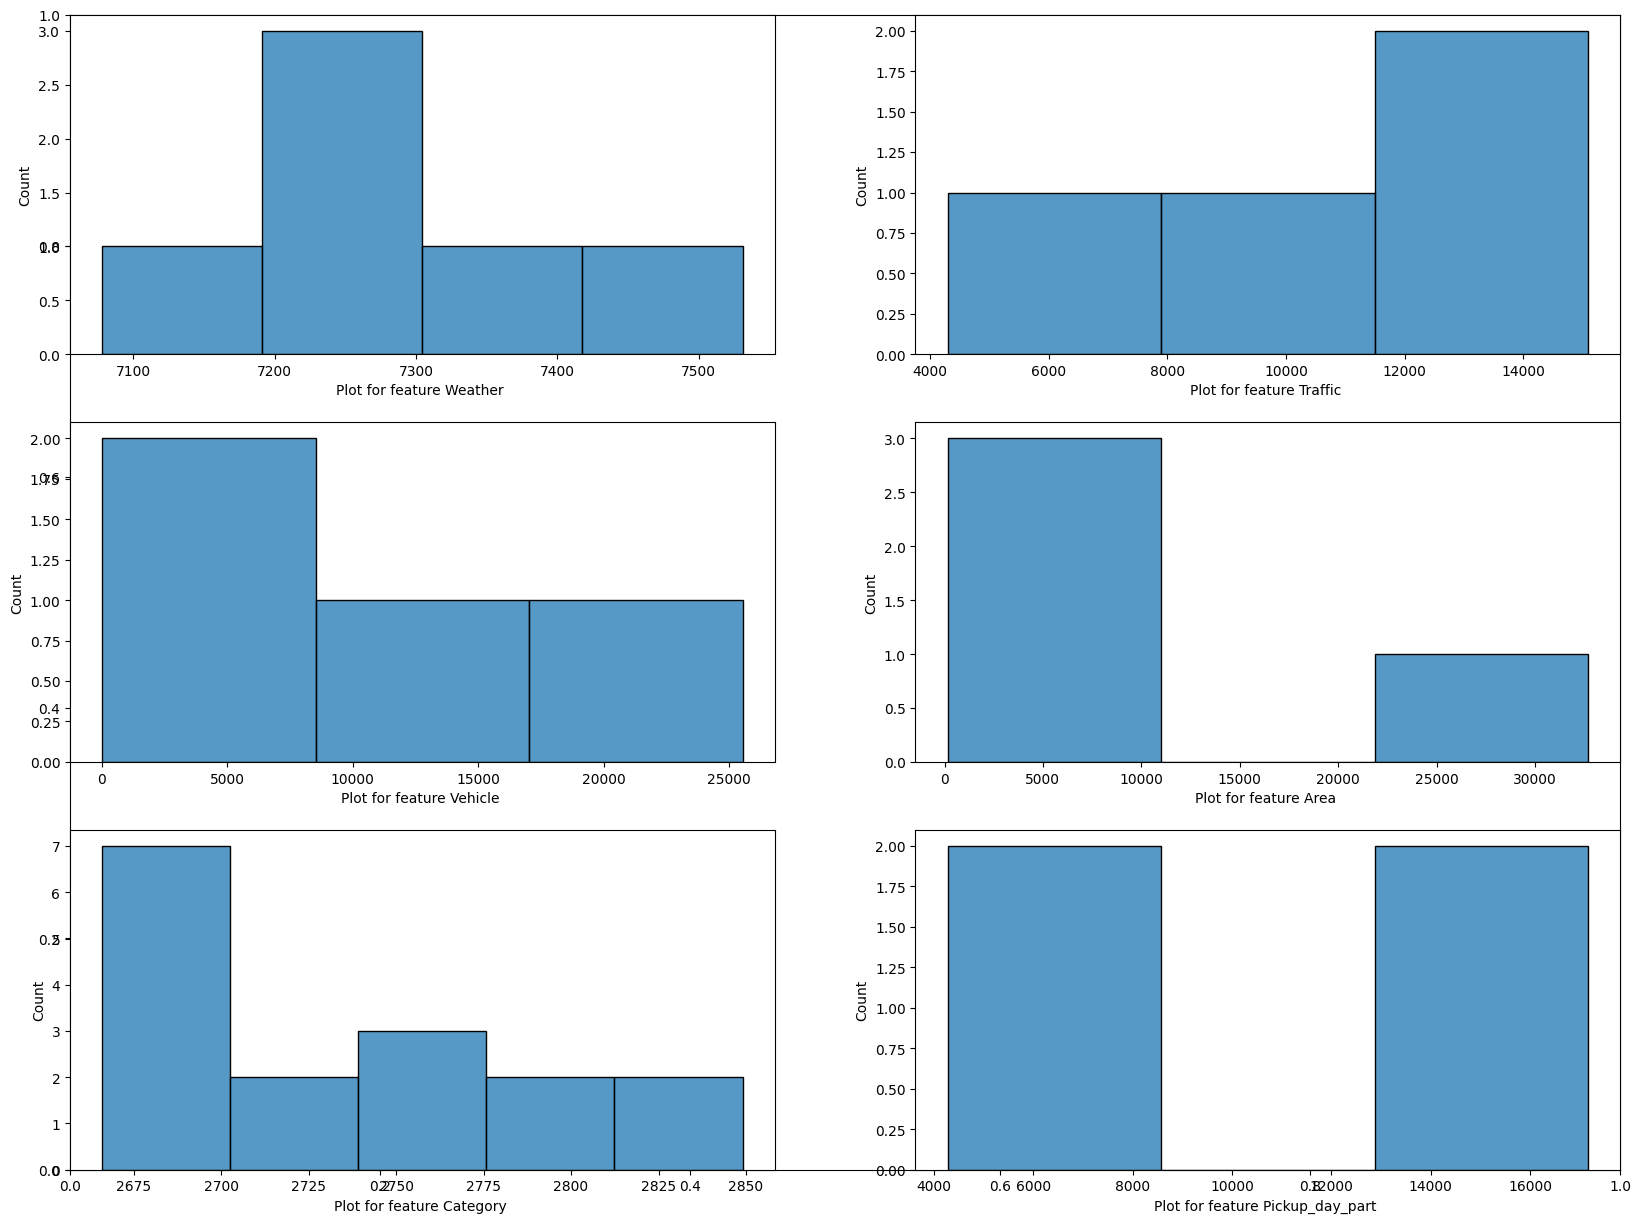

In [359]:
plt.subplots(figsize=(20,15))
j=1
for i in string_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.histplot(amazon[i].value_counts())
    j+=1
plt.show()

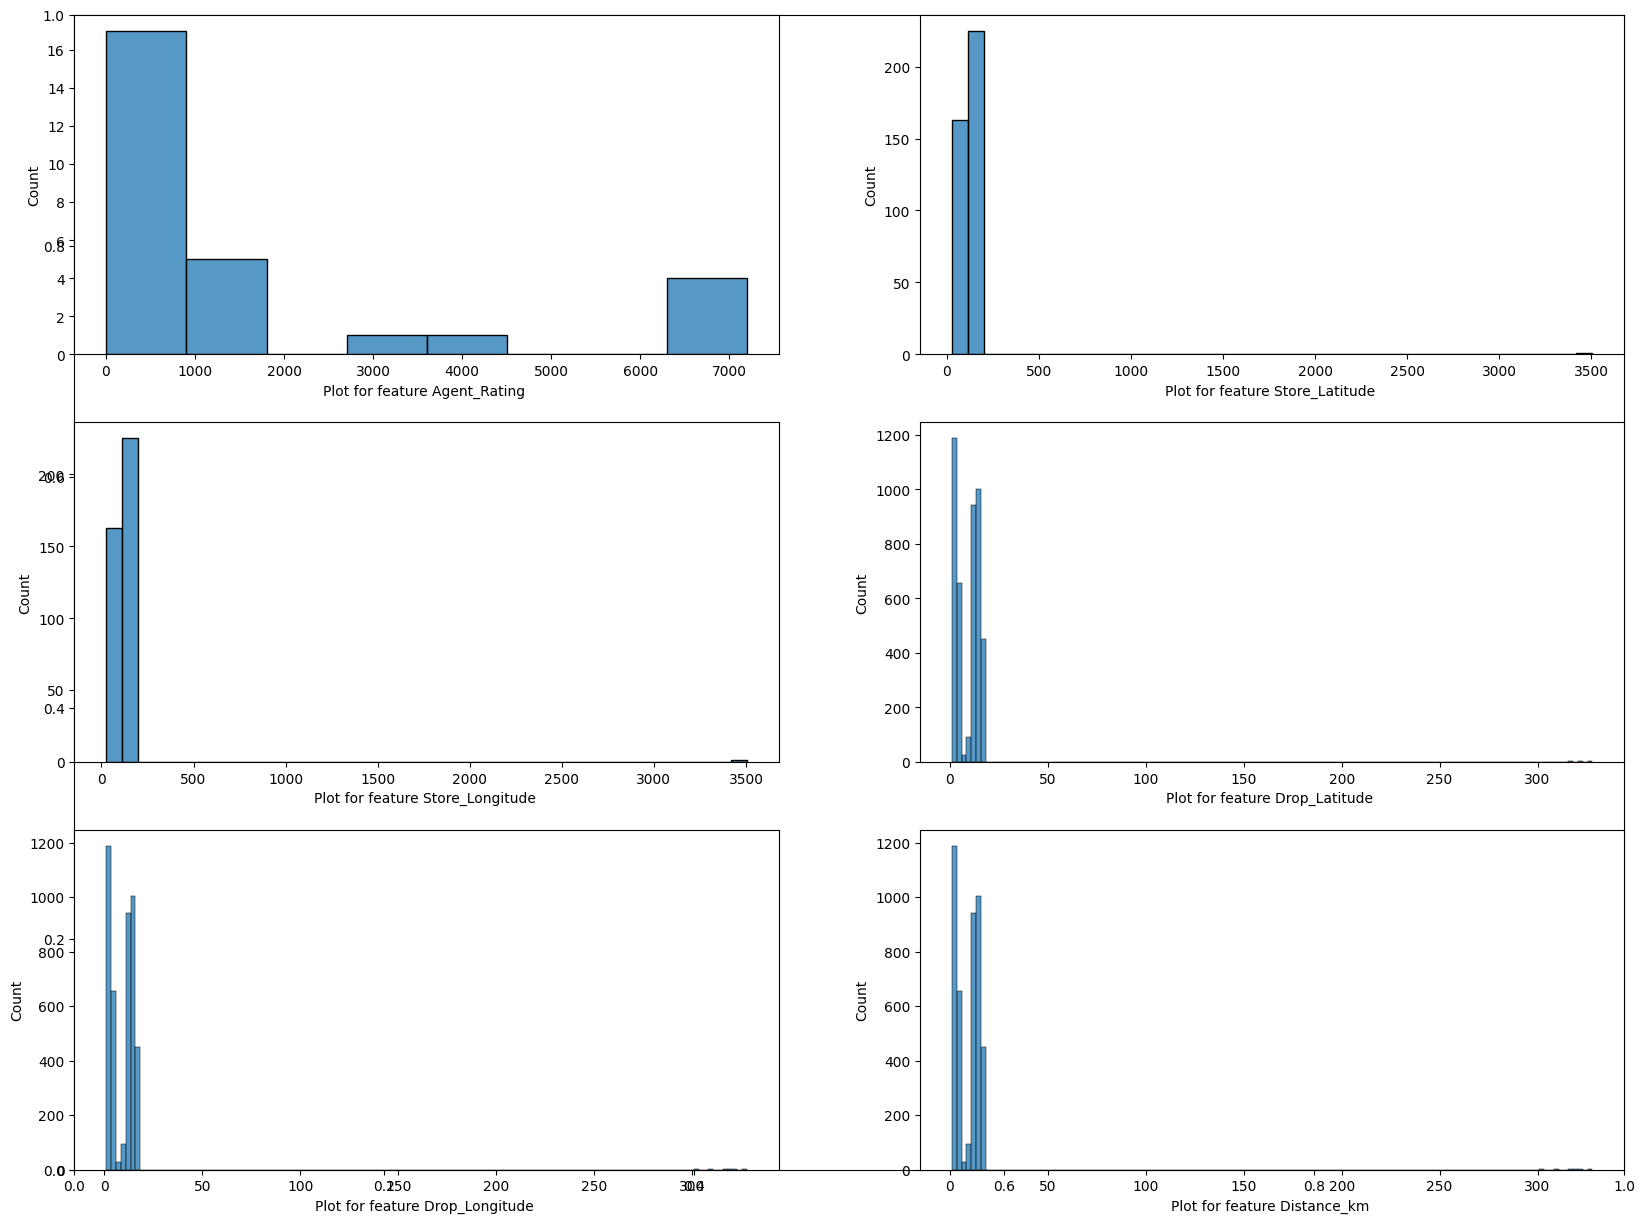

In [360]:
plt.subplots(figsize=(20,15))
j=1
for i in float_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.histplot(amazon[i].value_counts())
    j+=1
plt.show()

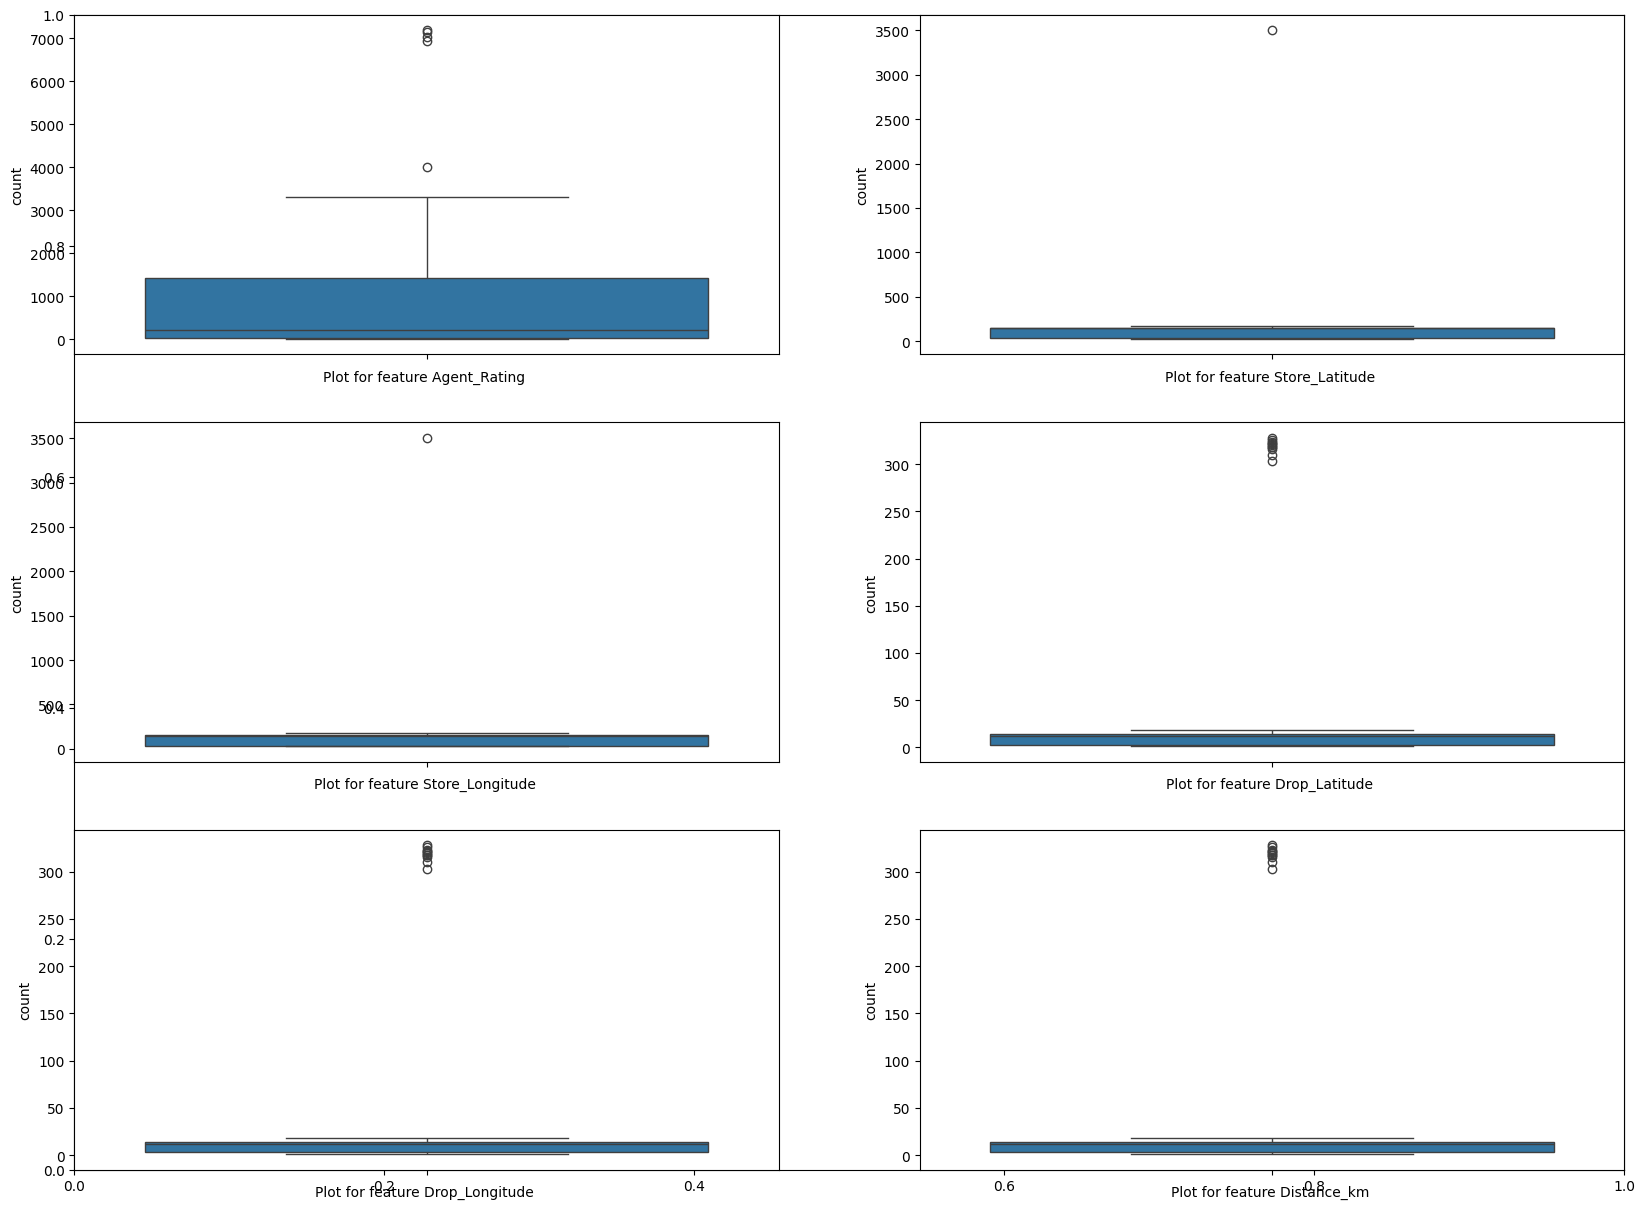

In [361]:
plt.subplots(figsize=(20,15))
j=1
for i in float_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.boxplot(amazon[i].value_counts())
    j+=1
plt.show()

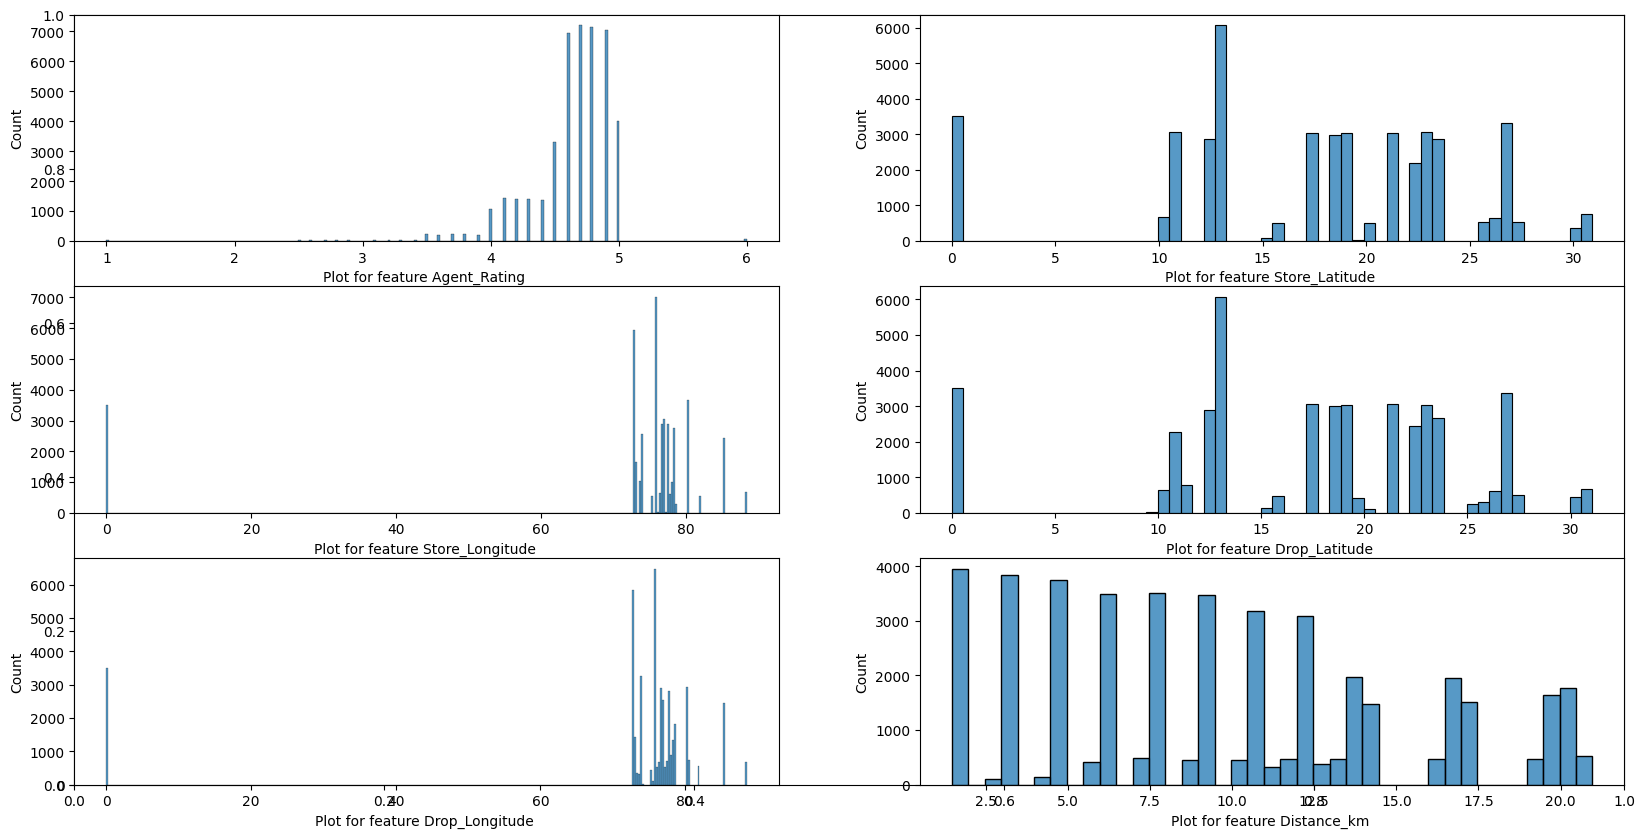

In [362]:
plt.subplots(figsize=(20,10))
j=1
for i in float_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.histplot(amazon[i])
    j+=1
plt.show()

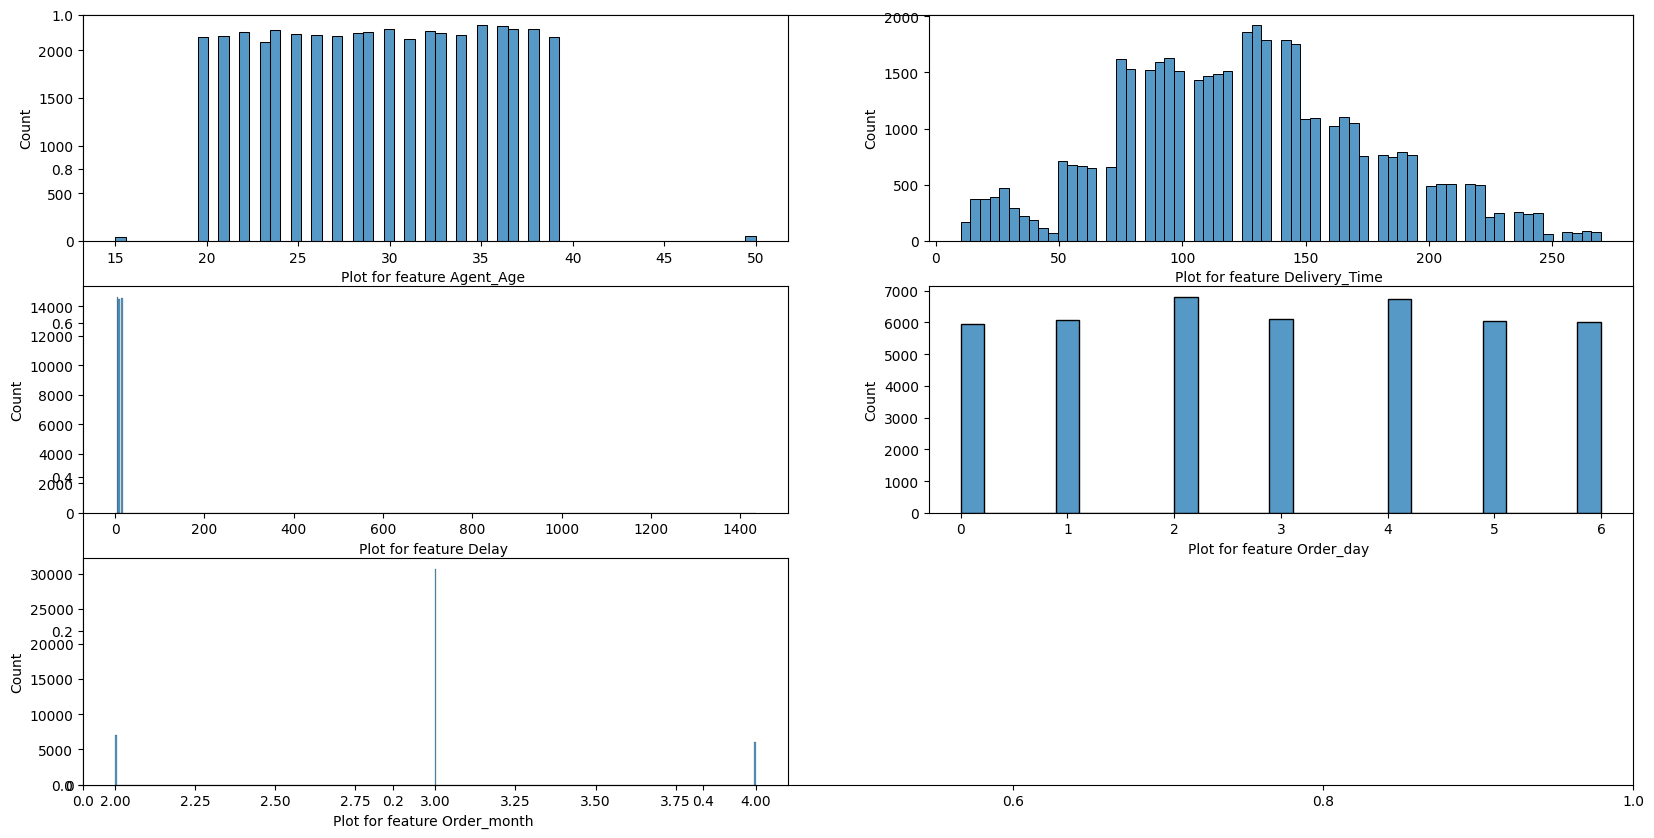

In [363]:
plt.subplots(figsize=(20,10))
j=1
for i in int_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.histplot(amazon[i])
    j+=1
plt.show()

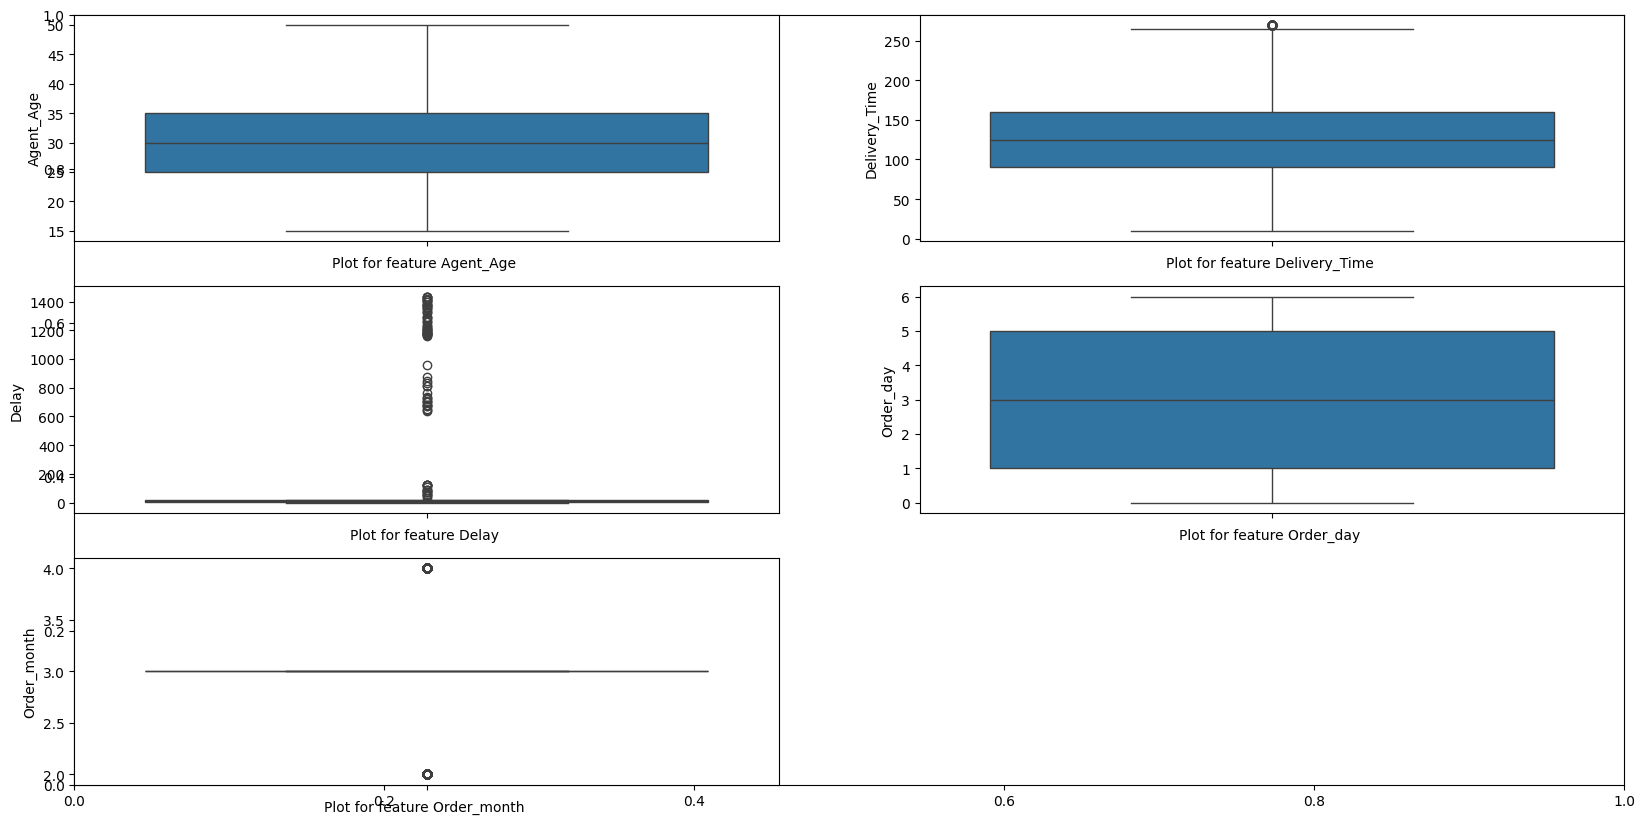

In [364]:
plt.subplots(figsize=(20,10))
j=1
for i in int_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.boxplot(amazon[i])
    j+=1
plt.show()

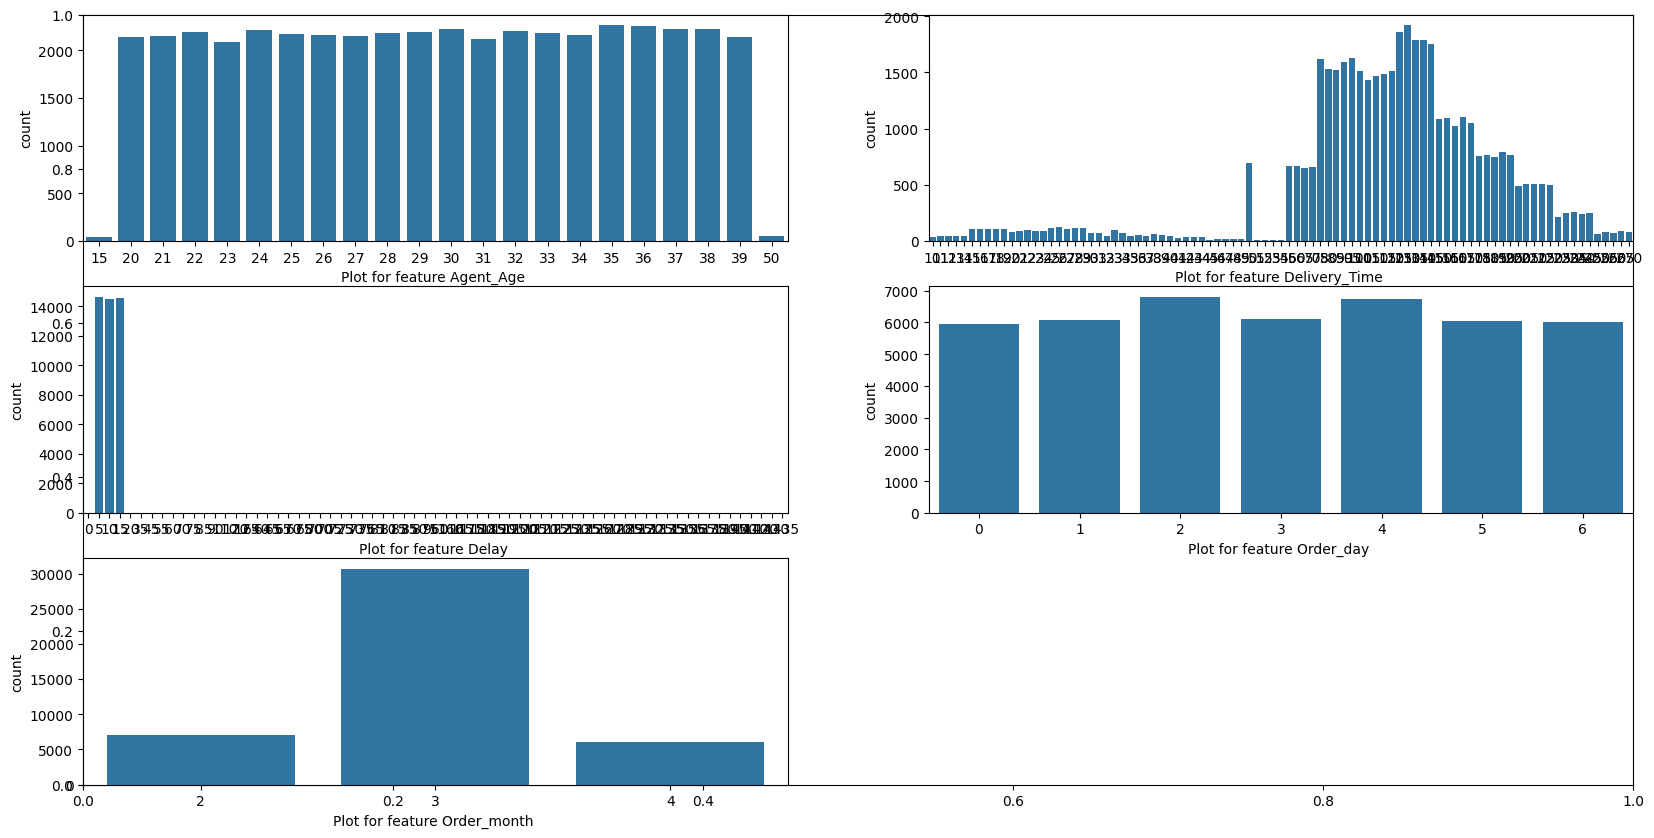

In [365]:
plt.subplots(figsize=(20,10))
j=1
for i in int_columns:
    plt.subplot(3,2,j)
    plt.xlabel(f"Plot for feature {i} ")
    sns.barplot(amazon[i].value_counts())
    j+=1
plt.show()

***Inferences***
--

- **Delivery Time**: The distribution is right-skewed, indicating most deliveries are completed within a certain time frame, but there are some outliers with higher delivery times.
- **Distance_km**: Most deliveries occur within a short distance, with a few long-distance deliveries as outliers.
- **Agent Rating**: The majority of agents have ratings clustered around the median, with very few low-rated agents.
- **Weather & Traffic**: Most orders are delivered in normal weather and low to medium traffic conditions.
- **Order & Pickup Times**: Orders and pickups are distributed throughout the day, with peaks during morning and afternoon.
- **Category, Vehicle, Area**: Certain categories, vehicles, and areas are more frequent, indicating business focus or operational hubs.
- **Order Day/Month**: Data is concentrated in the first three months of 2022, with some days having higher order volumes.

These insights help identify patterns and potential bottlenecks in the delivery process.

### UBM (Biravariate)

In [366]:
amazon.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Distance_km', 'Delay', 'Pickup_day_part',
       'Order_day', 'Order_month'],
      dtype='object')

In [367]:
amazon.groupby("Traffic")[["Delivery_Time","Distance_km"]].mean()

,Delivery_Time,Distance_km
Traffic,,
High,129.424115,4.398499
Jam,147.758980,12.055063
Low,101.471040,8.187439
Medium,126.839669,11.084125


<Axes: >

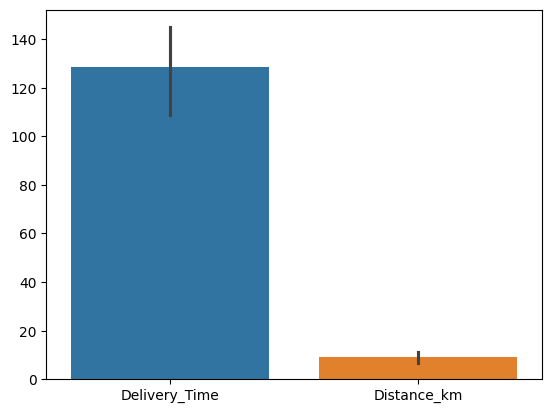

In [368]:
sns.barplot(amazon.groupby("Traffic")[["Delivery_Time","Distance_km"]].median())

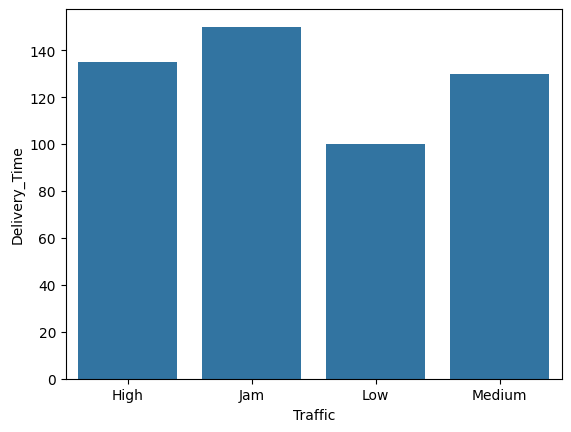

In [369]:
sns.barplot(amazon.groupby("Traffic")["Delivery_Time"].median());

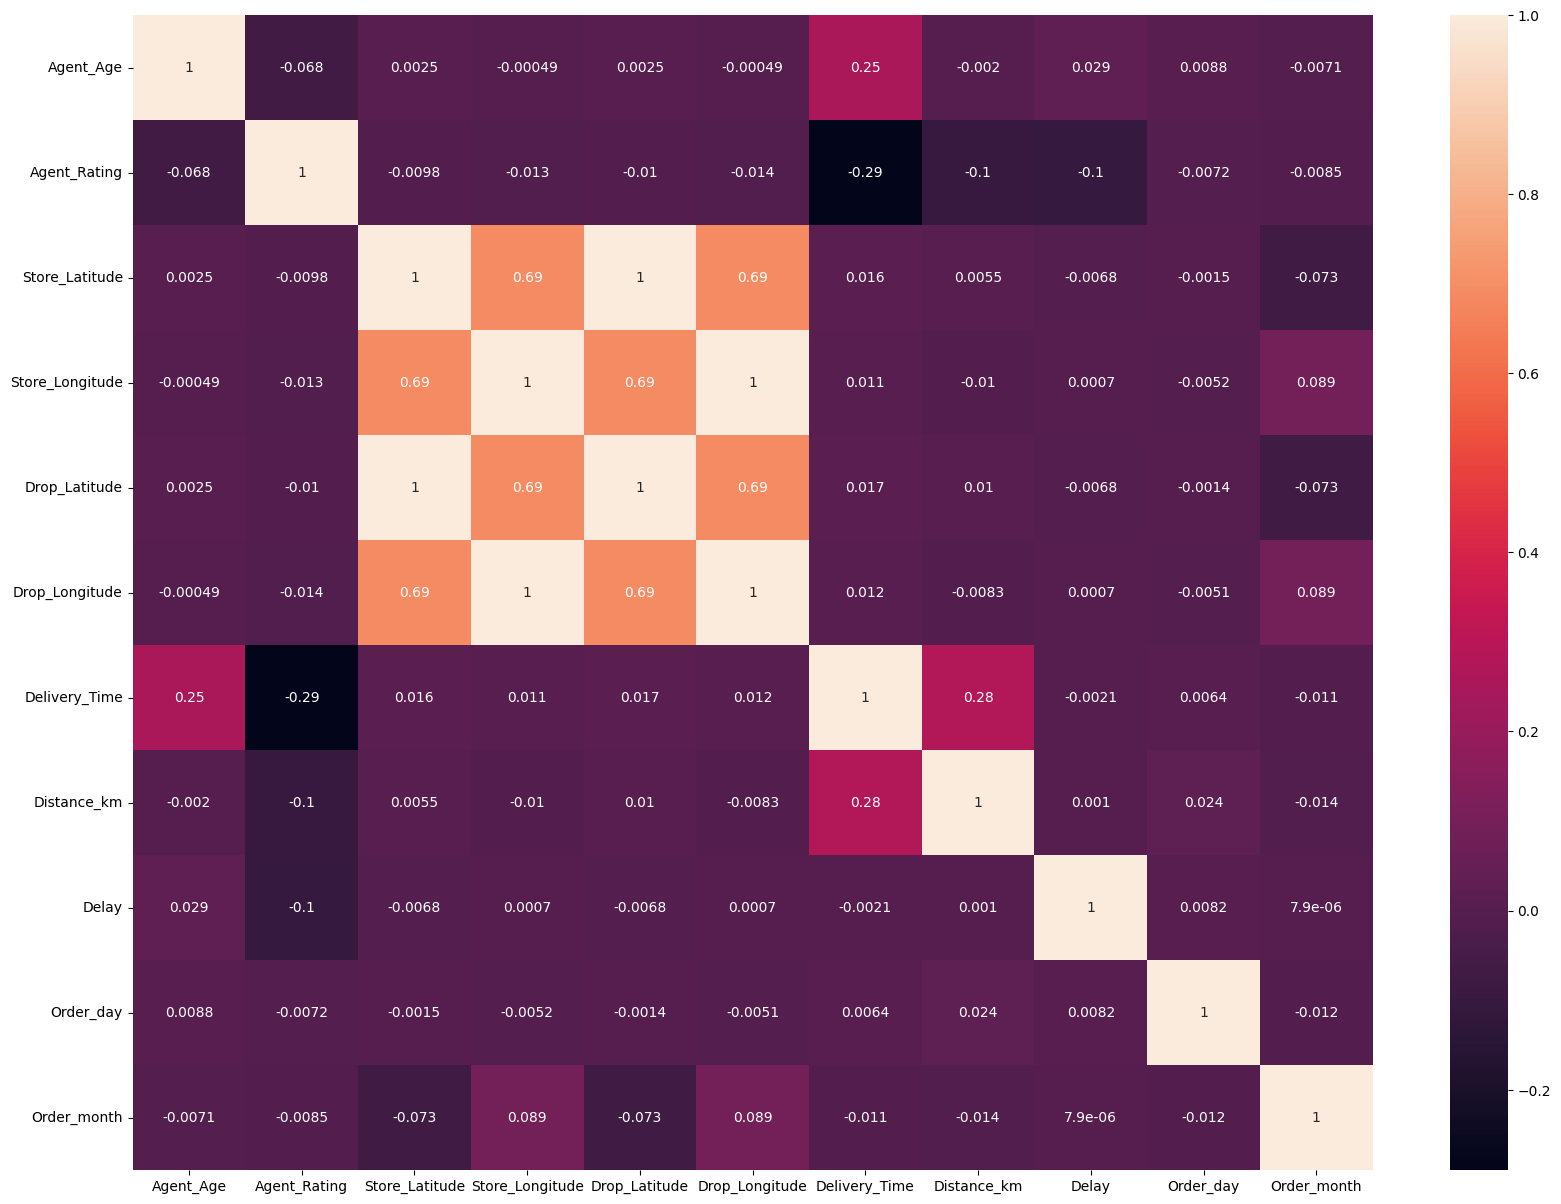

In [370]:
plt.figure(figsize=(20,15))
sns.heatmap(amazon.select_dtypes(["float","int"]).corr(),annot=True);
plt.show()

In [371]:
string_columns

['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Pickup_day_part']

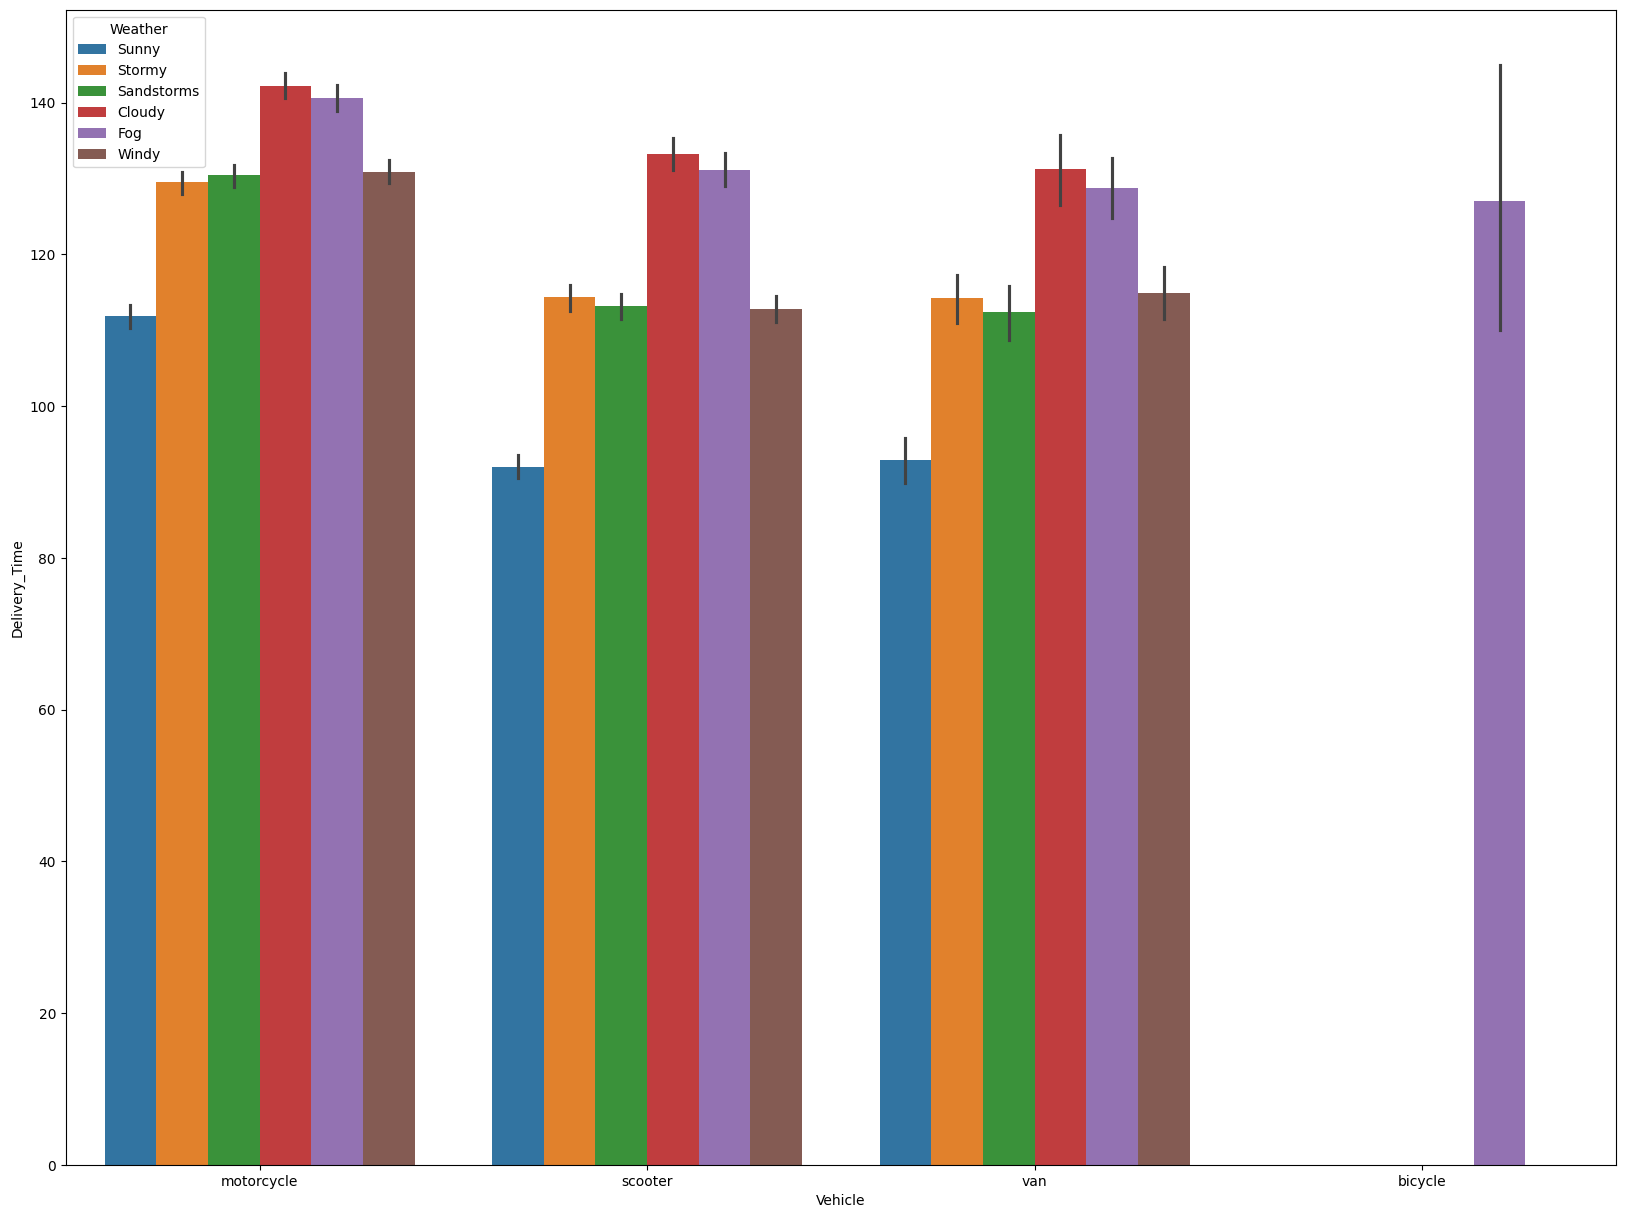

In [372]:
plt.figure(figsize=(20,15))
sns.barplot(data=amazon,x="Vehicle", y="Delivery_Time", hue="Weather", estimator="mean");
plt.show()

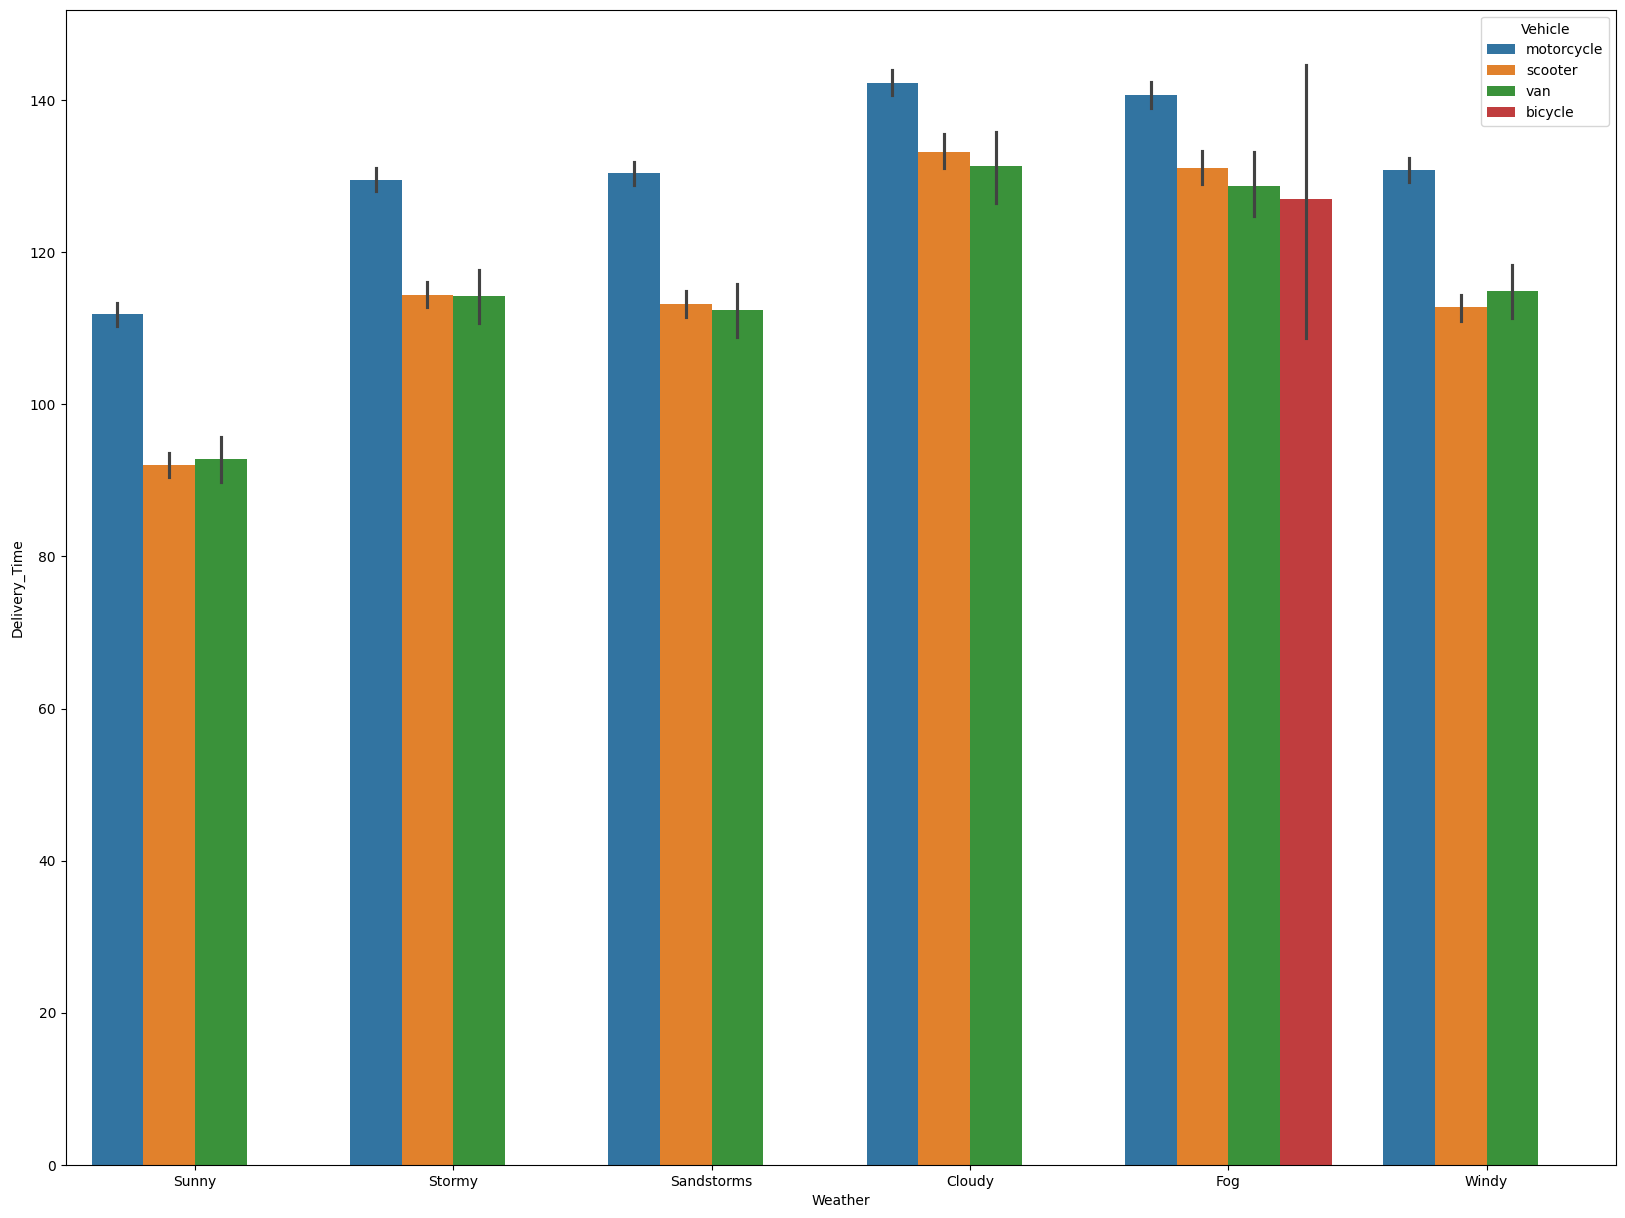

In [373]:
plt.figure(figsize=(20,15))
sns.barplot(data=amazon,x="Weather", y="Delivery_Time", hue="Vehicle", estimator="mean");
plt.show()

In [374]:
string_columns

['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Pickup_day_part']

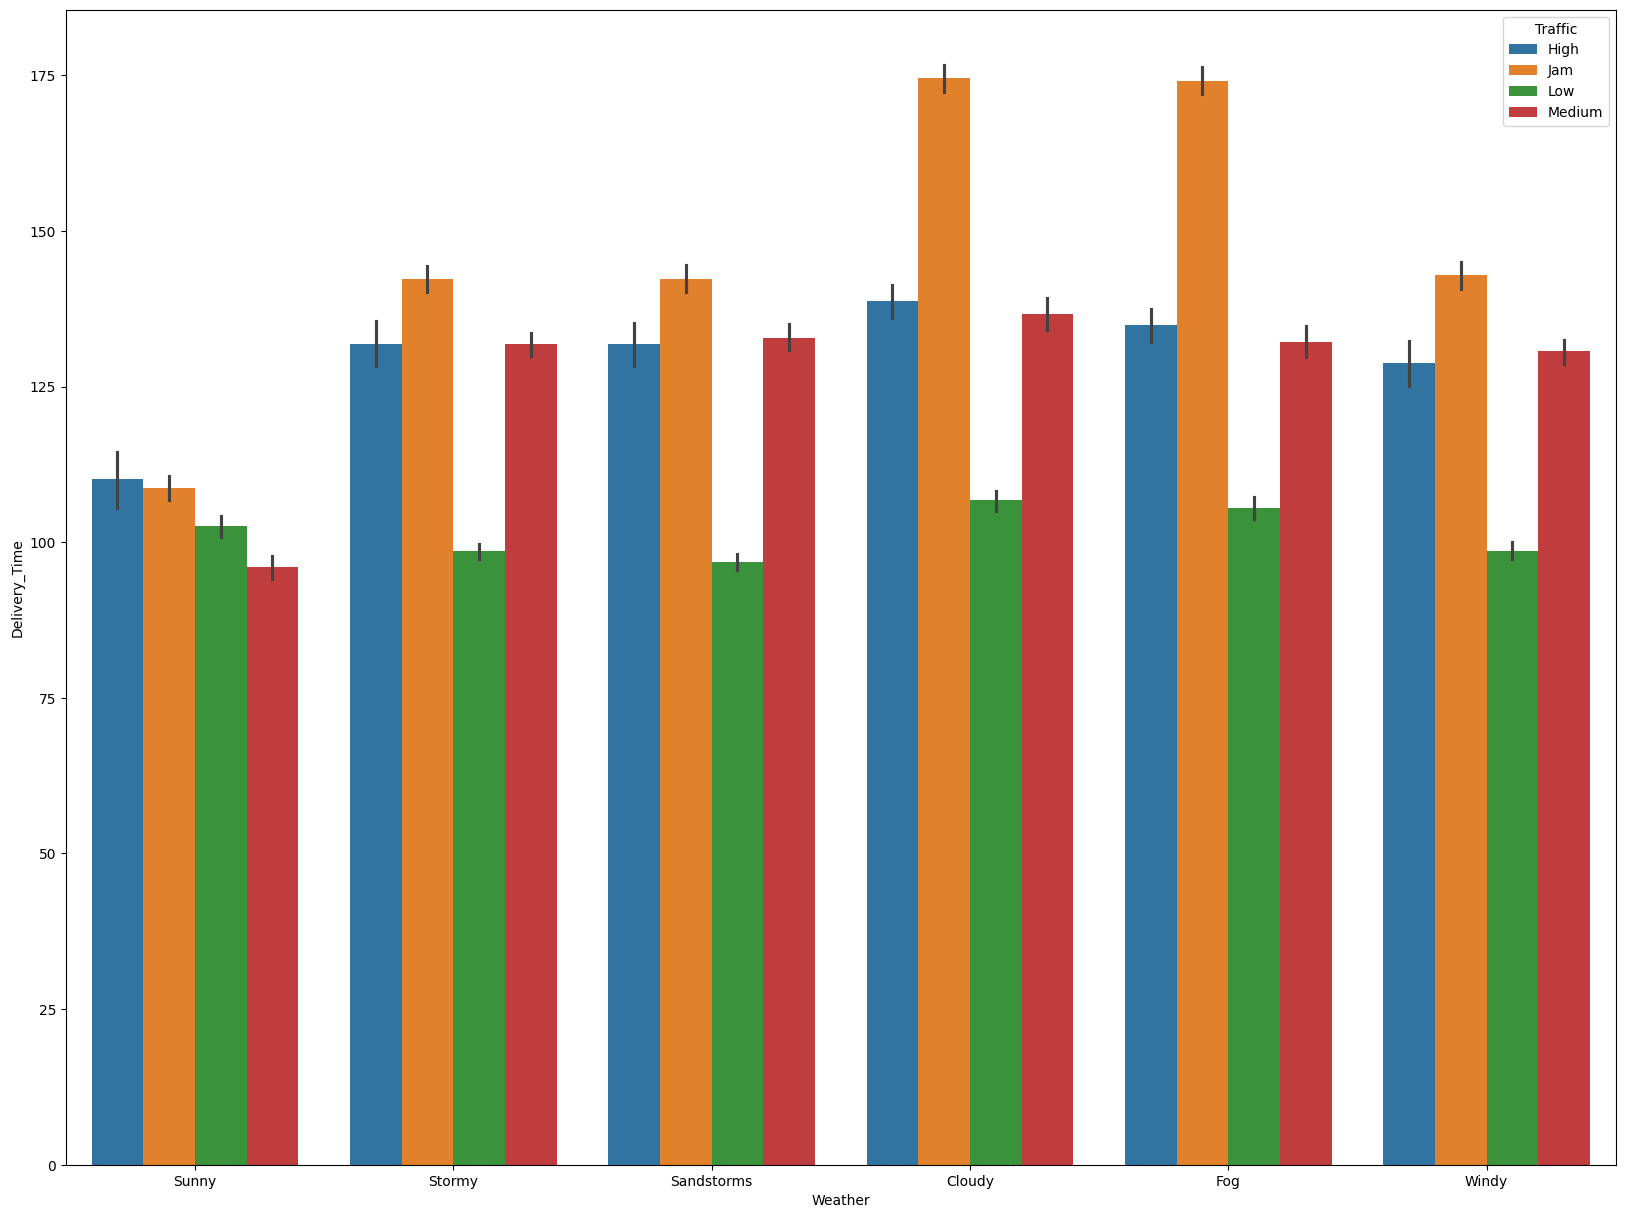

In [375]:
plt.figure(figsize=(20,15))
sns.barplot(data=amazon,x="Weather", y="Delivery_Time", hue="Traffic", estimator="mean");
plt.show()

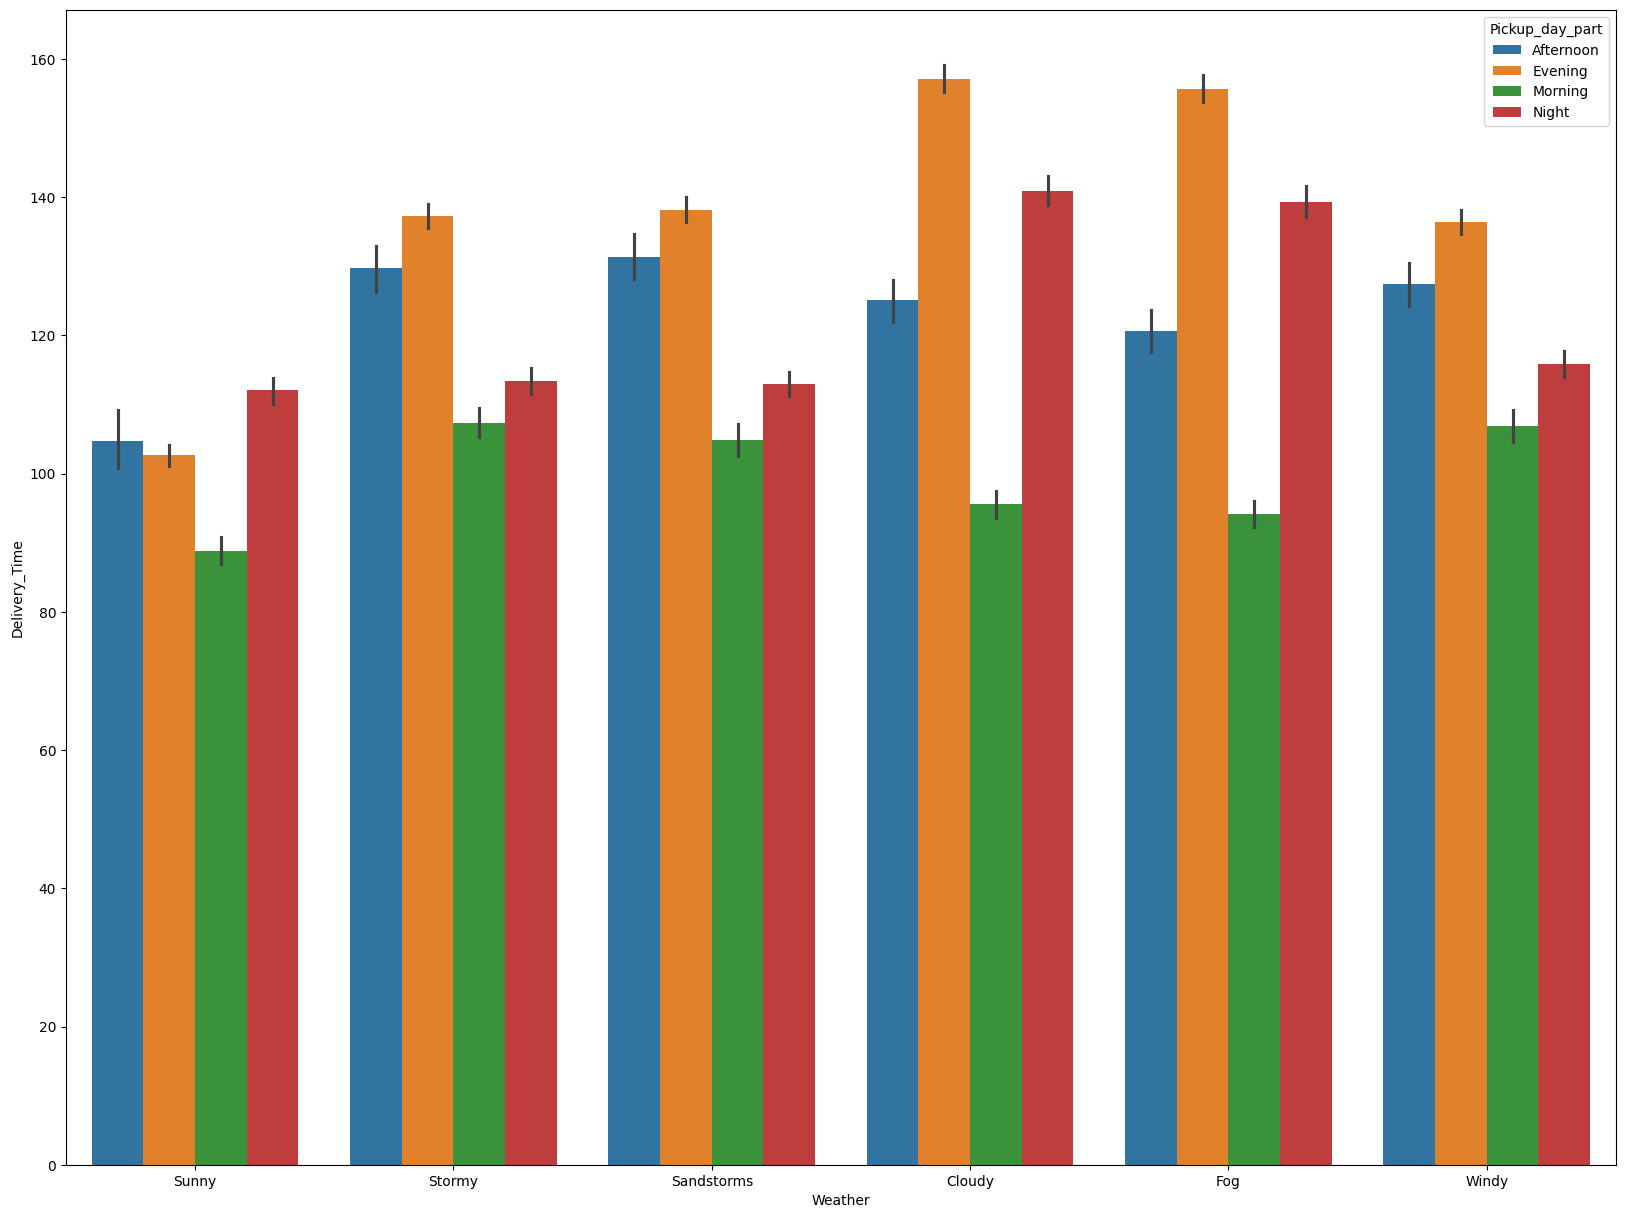

In [376]:
plt.figure(figsize=(20,15))
sns.barplot(data=amazon,x="Weather", y="Delivery_Time", hue="Pickup_day_part", estimator="mean");
plt.show()

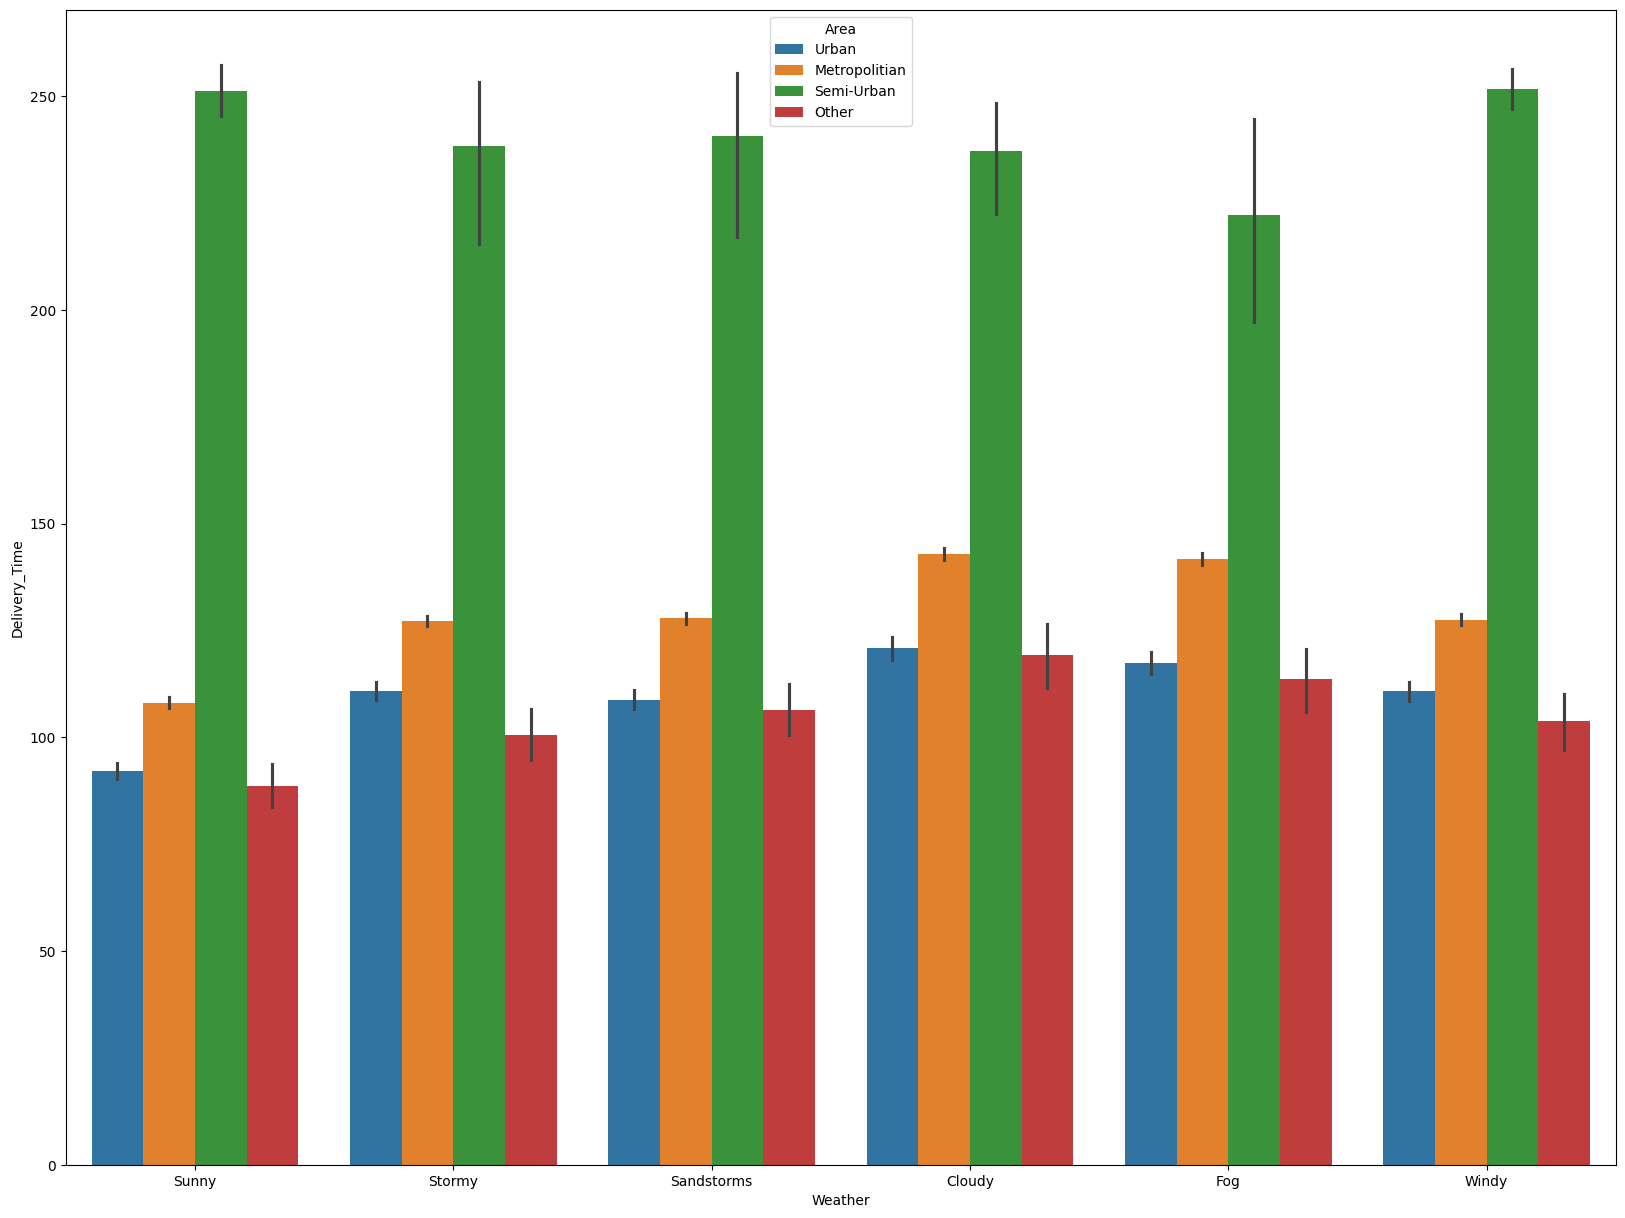

In [377]:
plt.figure(figsize=(20,15))
sns.barplot(data=amazon,x="Weather", y="Delivery_Time", hue="Area", estimator="mean");
plt.show()

In [378]:
amazon.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Distance_km', 'Delay', 'Pickup_day_part',
       'Order_day', 'Order_month'],
      dtype='object')

In [379]:
amazon.set_index("Order_ID", inplace=True)

In [380]:
amazon.head(2)

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Pickup_day_part,Order_day,Order_month
Order_ID,,,,,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,Morning,5,3
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,Evening,4,3


In [381]:
amazon.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_km,Delay,Order_day,Order_month
count,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633862,17.395434,70.758244,17.459031,70.821842,124.905645,9.732784,11.731064,3.000800,2.979812
std,5.815155,0.334518,7.341599,21.152972,7.342950,21.153148,51.915451,5.603677,45.114808,1.969838,0.546506
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,10.000000,1.465067,0.000000,0.000000,2.000000
25%,25.000000,4.500000,12.934179,73.170283,12.985996,73.280000,90.000000,4.663412,5.000000,1.000000,3.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633626,76.002574,125.000000,9.220148,10.000000,3.000000,3.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000,13.681379,15.000000,5.000000,3.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000,20.969489,1435.000000,6.000000,4.000000


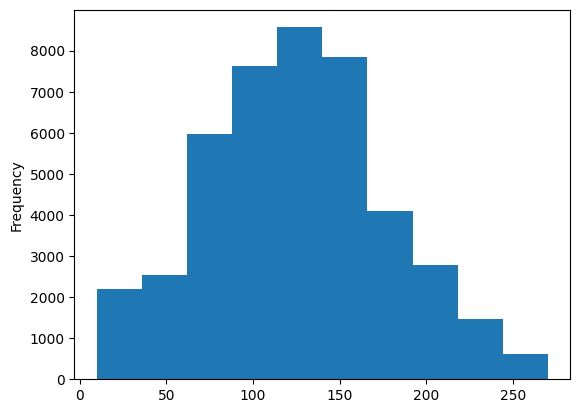

In [382]:
amazon["Delivery_Time"].plot(kind="hist");

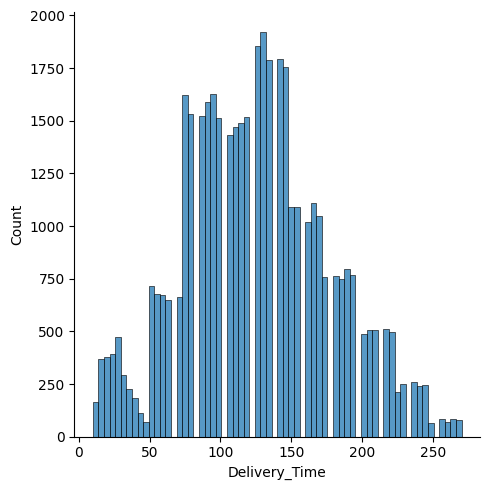

In [383]:
sns.displot(amazon["Delivery_Time"]);

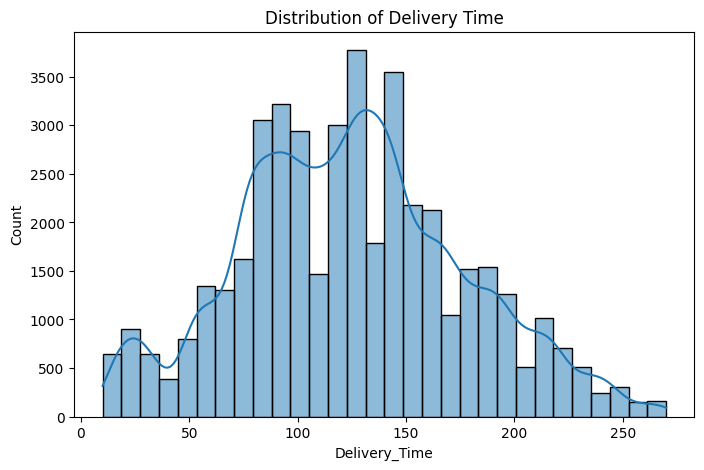

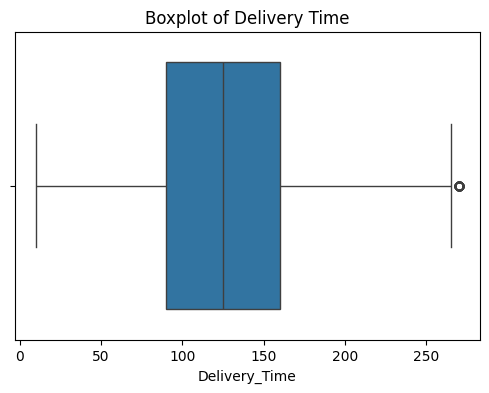

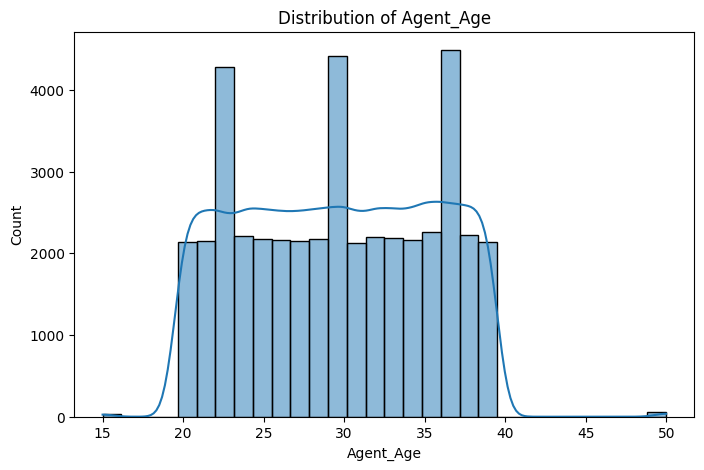

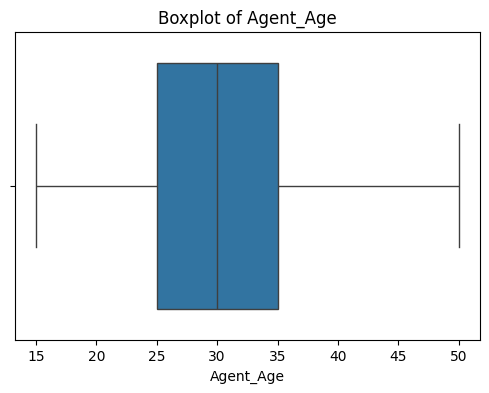

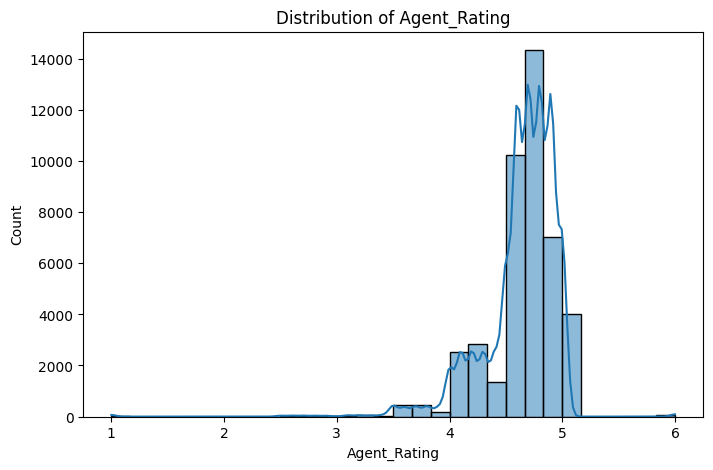

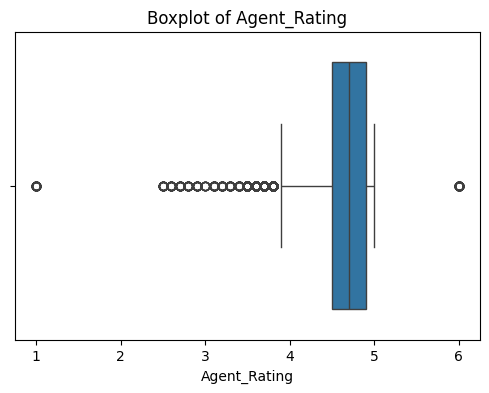

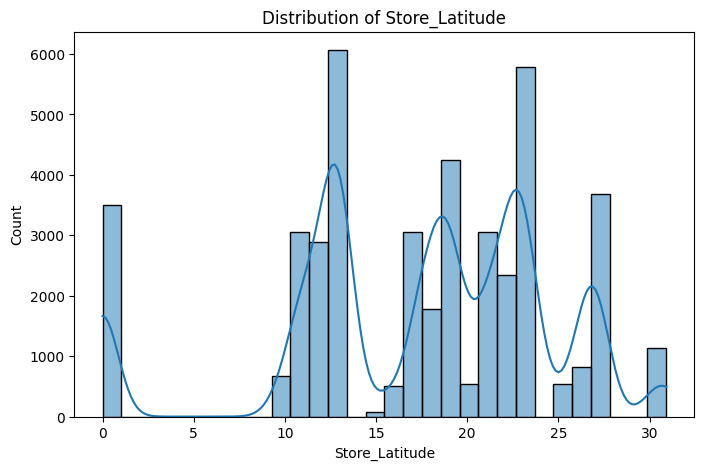

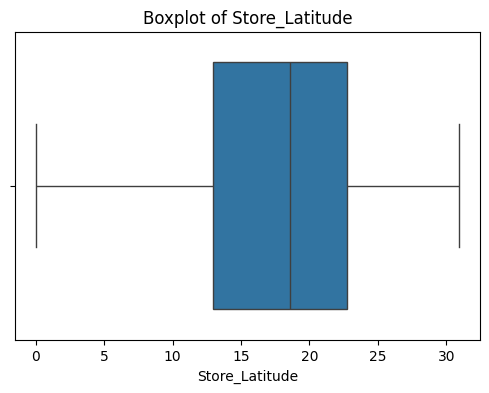

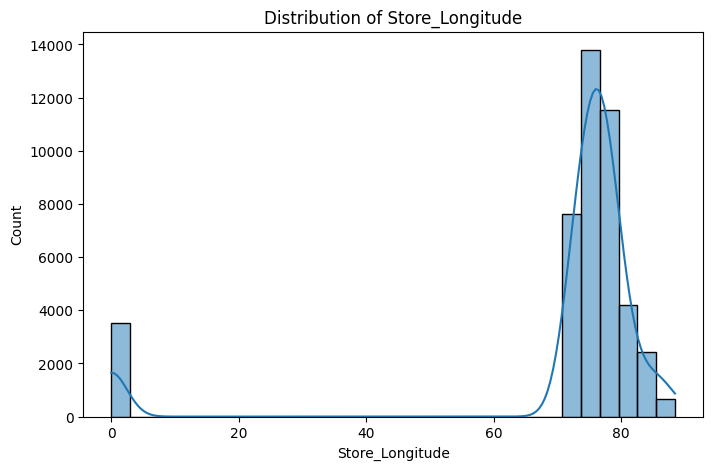

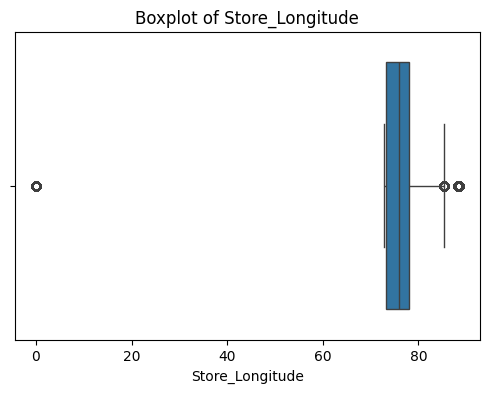

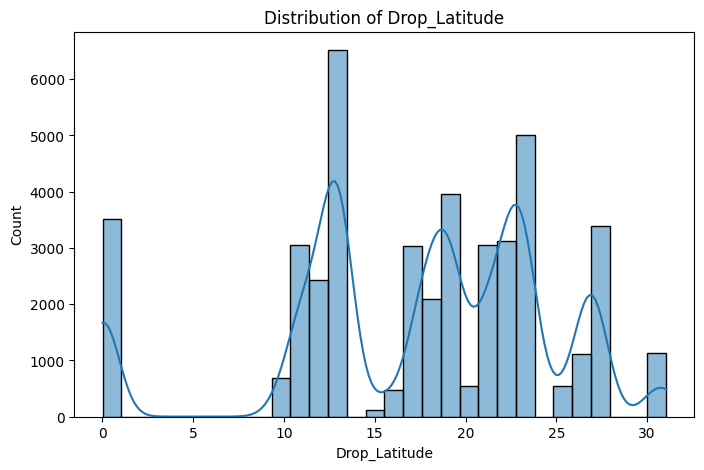

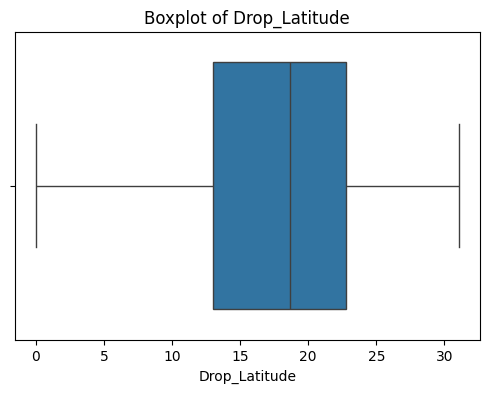

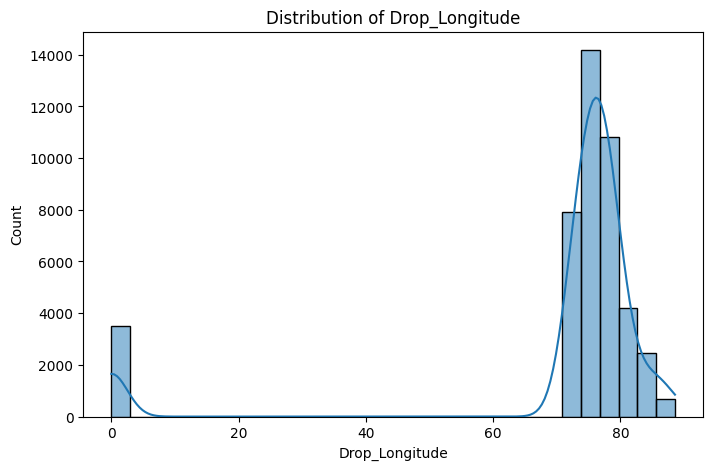

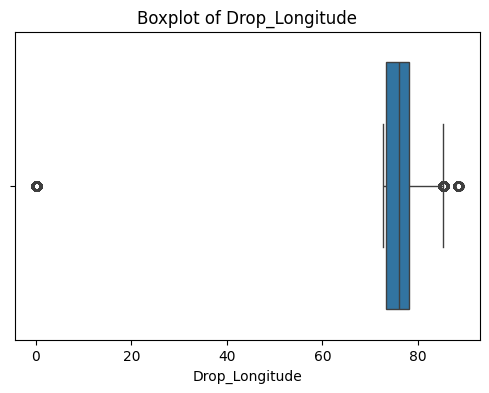

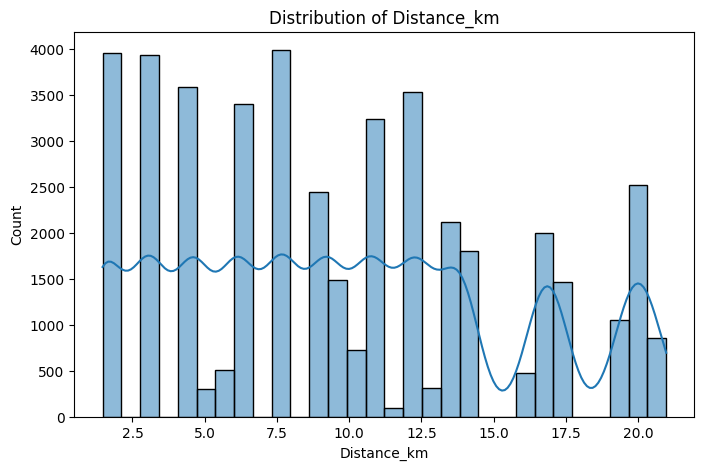

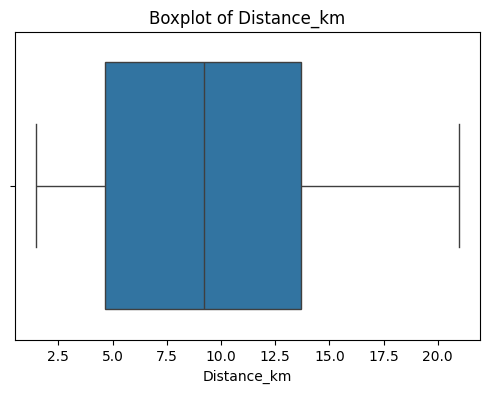

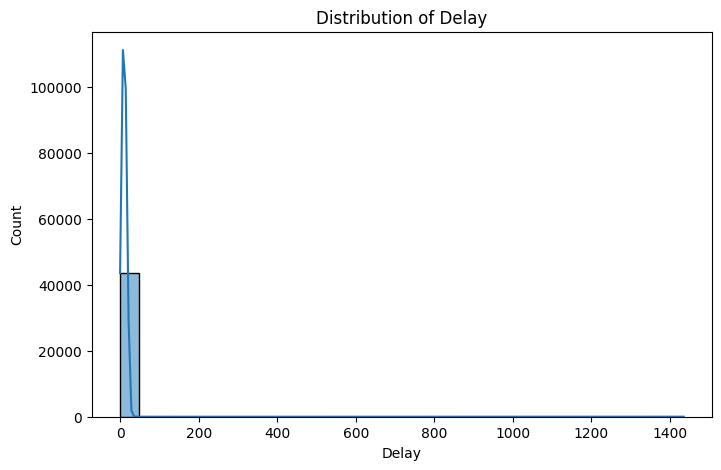

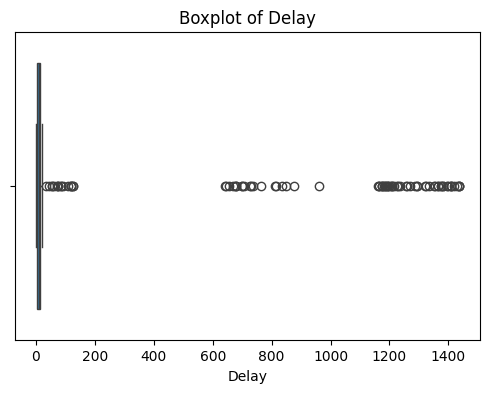

In [384]:
# Distribution of target variable (Delivery_Time)
plt.figure(figsize=(8,5))
sns.histplot(amazon["Delivery_Time"], kde=True, bins=30)
plt.title("Distribution of Delivery Time")
plt.show()

# Boxplot for Delivery_Time (to detect outliers)
plt.figure(figsize=(6,4))
sns.boxplot(x=amazon["Delivery_Time"])
plt.title("Boxplot of Delivery Time")
plt.show()

# Distribution of numerical predictors
num_cols = amazon.select_dtypes(include=["int64", "float64"]).columns.drop("Delivery_Time")

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(amazon[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=amazon[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


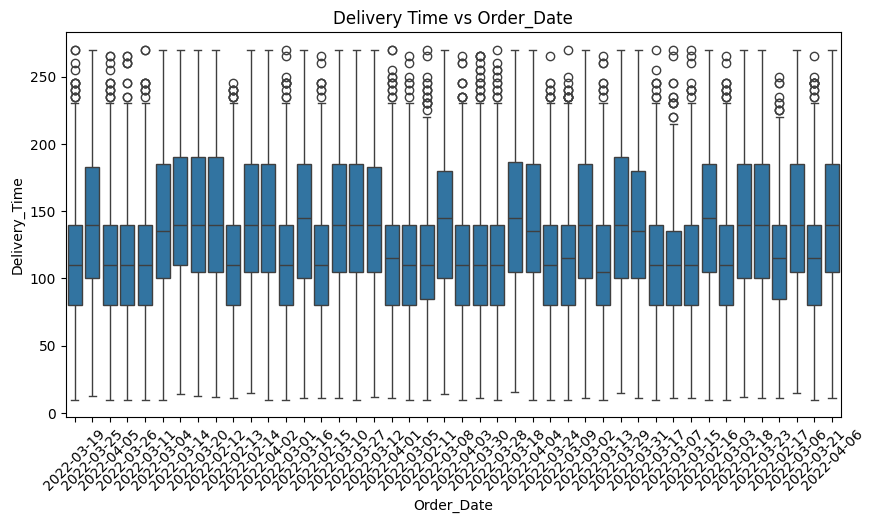

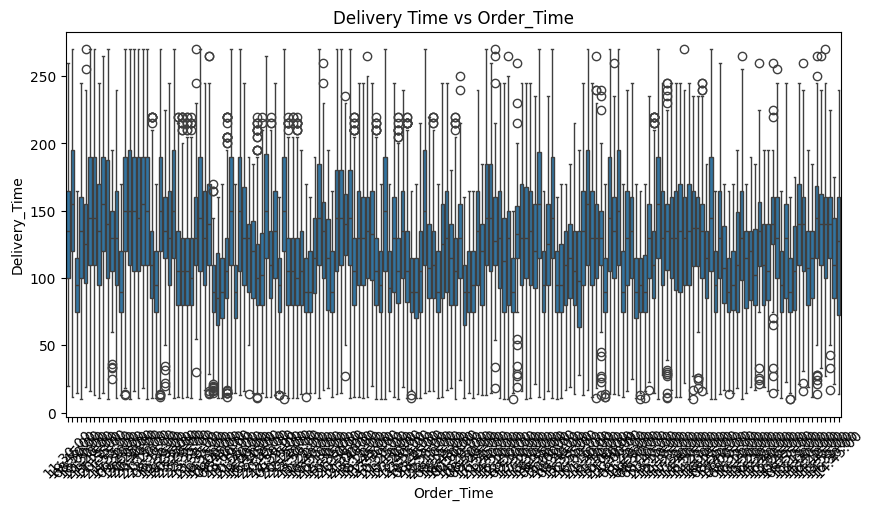

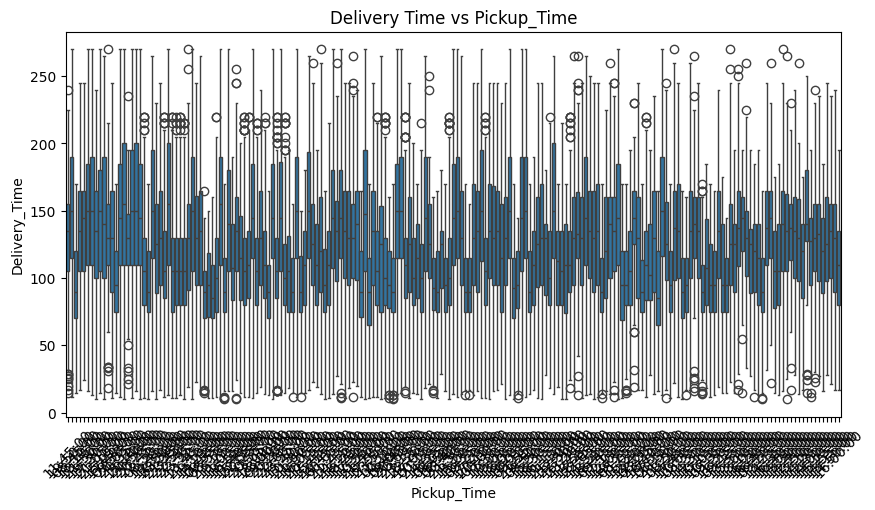

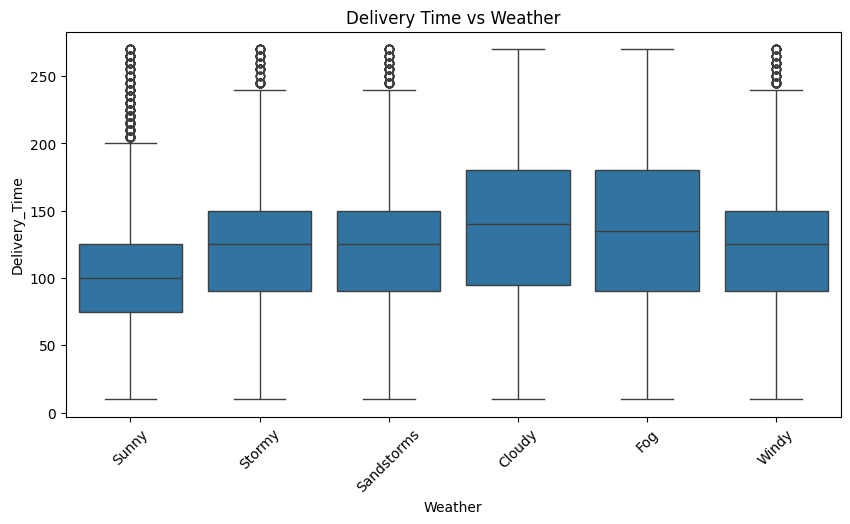

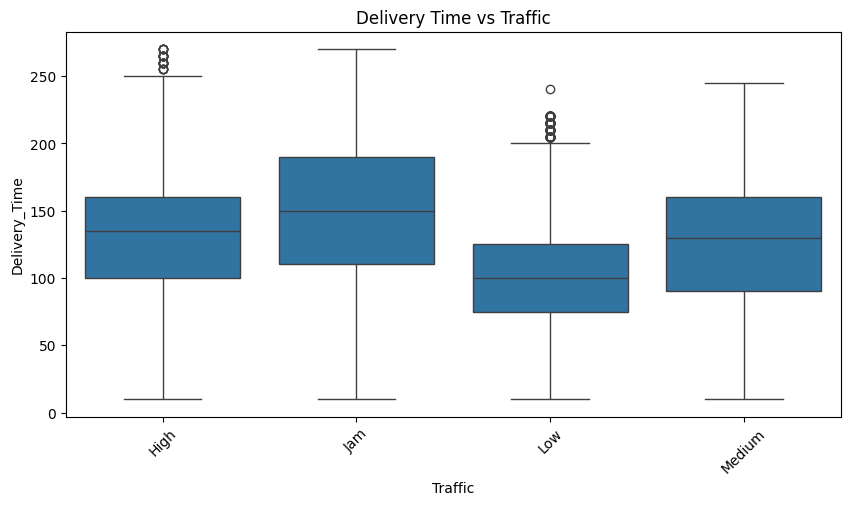

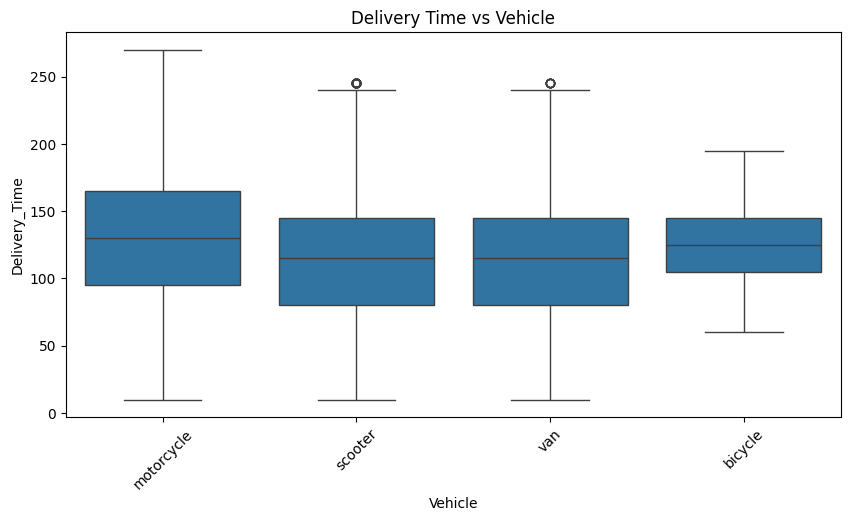

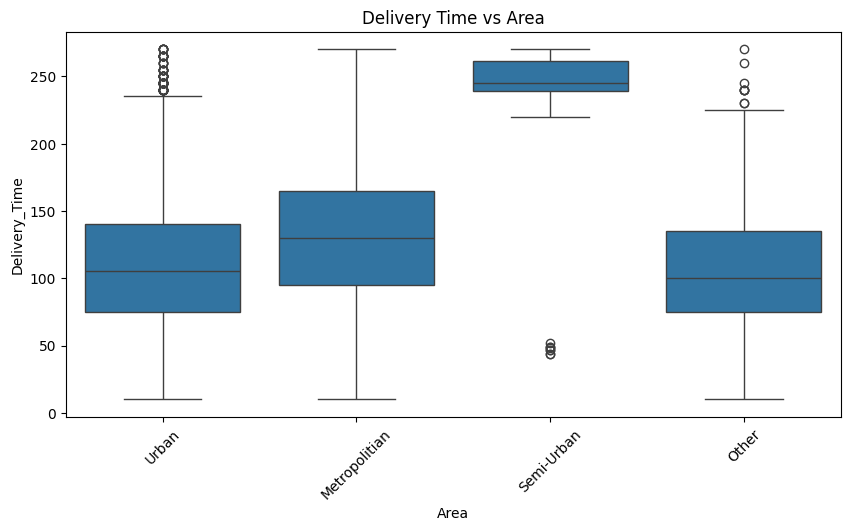

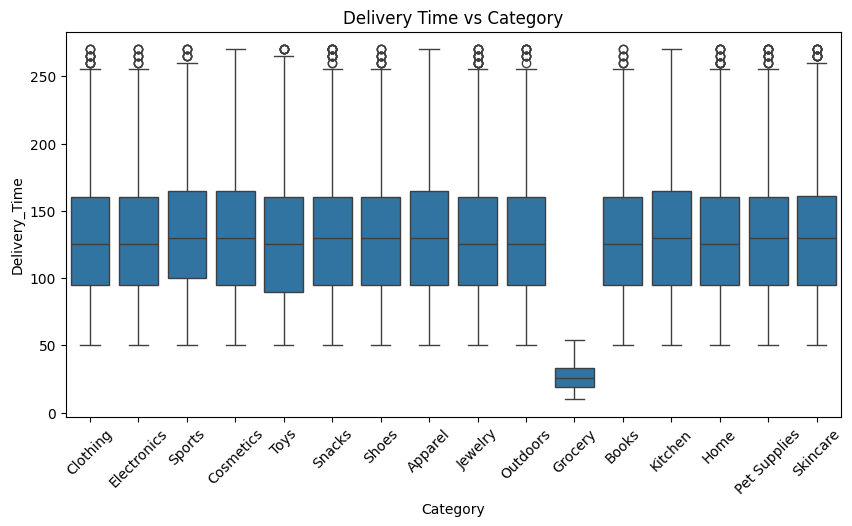

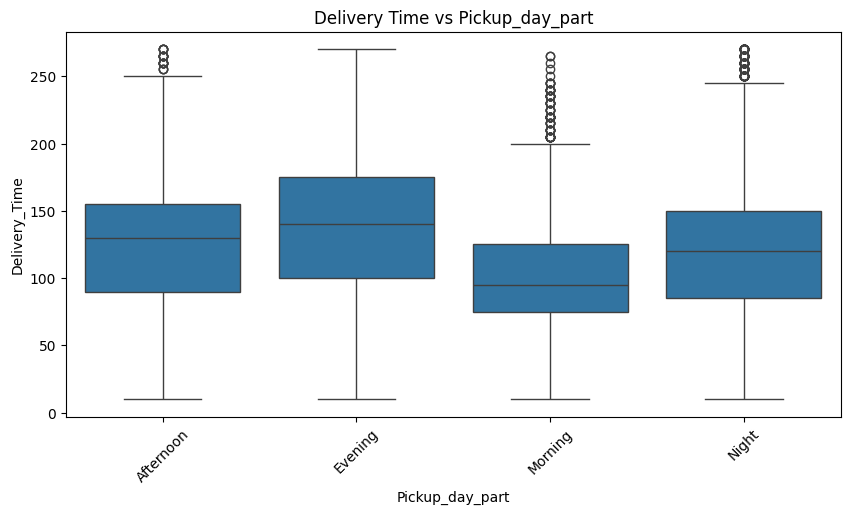

In [385]:
cat_cols = amazon.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y="Delivery_Time", data=amazon)
    plt.title(f"Delivery Time vs {col}")
    plt.xticks(rotation=45)
    plt.show()


Min Delivery_Time: 10
Max Delivery_Time: 270
Mean Delivery_Time: 124.90564484784746


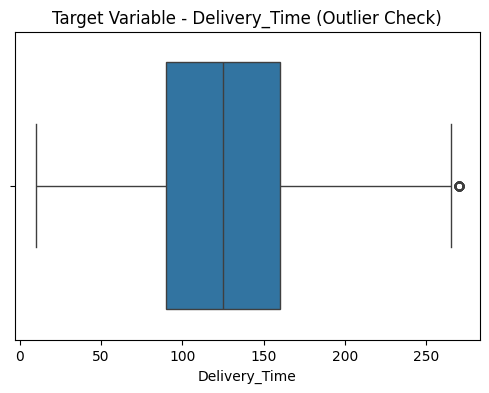

In [386]:
# Check for anomalies in Delivery_Time
print("Min Delivery_Time:", amazon["Delivery_Time"].min())
print("Max Delivery_Time:", amazon["Delivery_Time"].max())
print("Mean Delivery_Time:", amazon["Delivery_Time"].mean())

# Boxplot to visualize anomalies
plt.figure(figsize=(6,4))
sns.boxplot(x=amazon["Delivery_Time"])
plt.title("Target Variable - Delivery_Time (Outlier Check)")
plt.show()


In [387]:
amazon.shape

(43739, 20)

***Order_Month Column is not Useful hence Dropping***

In [388]:
amazon.columns

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'Distance_km', 'Delay', 'Pickup_day_part', 'Order_day',
       'Order_month'],
      dtype='object')

In [389]:
amazon.drop("Order_month", inplace=True, axis=1)

In [390]:
amazon.shape

(43739, 19)

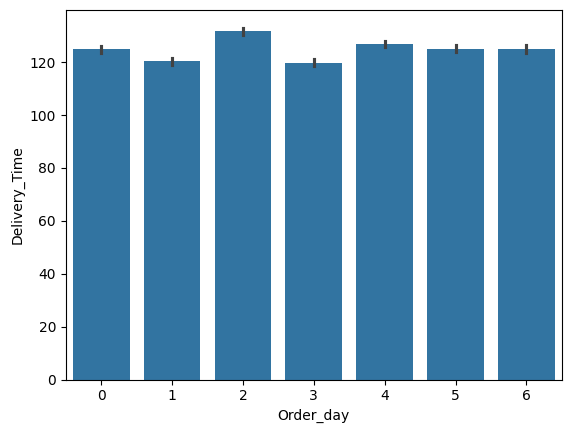

In [391]:
sns.barplot(x="Order_day", y="Delivery_Time", data=amazon, estimator="mean");

In [392]:
amazon['Order_Date'] = pd.to_datetime(amazon['Order_Date']).dt.date
amazon['Order_Time'] = pd.to_datetime(amazon['Order_Time'], errors="coerce",format="%H:%M:%S").dt.time 
amazon['Pickup_Time'] = pd.to_datetime(amazon['Pickup_Time'], errors="coerce",format="%H:%M:%S").dt.time 

In [393]:
amazon

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Pickup_day_part,Order_day
Order_ID,,,,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,Morning,5
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,Evening,4
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,15,Morning,5
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10,Evening,1
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,15,Afternoon,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.489846,10,Morning,3
aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007735,15,Evening,2
xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.657195,15,Night,4


***Dropping Order_date as we have only 3 months of Data and we will be general Model to predict 
    Dropping Order_time and Pickup time as New Feature 'Delay' already added with the help of these columns which calculates the difference between 
    order_time and pickuptime***

In [394]:
amazon.drop(["Order_Date","Order_Time","Pickup_Time"],axis=1, inplace=True)

In [ ]:
amazon.shape

(43739, 16)

: 